# Paper data and figures

## Documentation and Imports


Created on 03-08-2022

Author: Valentin Laplaud


In [1]:
## Clean up before script start 

for element in dir():

    if element[0:1] != "_":

        del globals()[element]
import gc
gc.collect()


print('\033[1m' + '\033[4m' + '\nRunning :  ''PaperDataAndFigs''\n' + '\033[0m')

import datetime

# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use('tkagg')
%matplotlib inline

COLOR = 'white'
COLOR2 = 'black'

mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['axes.labelsize'] =  'large'

mpl.rcParams["figure.facecolor"] = COLOR2
mpl.rcParams["axes.facecolor"] = COLOR2
mpl.rcParams["savefig.facecolor"] = COLOR2
mpl.rcParams['axes.facecolor'] = COLOR2

# numbers handling
import numpy as np
# import numpy.matlib as mtl
import pandas as pd

# to hide known warnings
import warnings
warnings.filterwarnings("ignore")

# General system functions
import os
import shutil
import sys

import time

# my functions
sys.path.append(r'd:\Users\laplaud\Desktop\PostDoc\Code\PythonFunctions\\')
import VallapFunc as vf
from StatsFunctions import plotSig, Corr
from PlotFunctions import compareGrowth, compareHydroMech, GOC_Comp, plotGRratio, sizeVar, successiveOC, plotRhizoides



Running :  PaperDataAndFigs



## Data loading and color definition

In [2]:
%run d:\Users\laplaud\Desktop\PostDoc\Code\PythonFunctions\ExperimentList.py

Data choice made.


### Loading

In [3]:
####################################### Growth #########################################################################################

################# Ctrls

## Expe 220214 Ctrl growth -> Ctrl 1
GD220214_Ct1 = pd.read_csv(P220214_Ct1 + '\\GlobalData220214_Ct1_AreaFit.csv', index_col = 'Ind') 
GD220214_Ct2 = pd.read_csv(P220214_Ct2 + '\\GlobalData220214_Ct2_AreaFit.csv', index_col = 'Ind')      

# Expe 220531 Ctrl growth -> Ctrl 2
GD220531_Ct1 = pd.read_csv(P220531_Ct1 + '\\GlobalData220531_Ct1_AreaFit.csv', index_col = 'Ind') 
GD220531_Ct2 = pd.read_csv(P220531_Ct2 + '\\GlobalData220531_Ct2_AreaFit.csv', index_col = 'Ind')      

## Expe 220727 Ctrl growth -> Ctrl 3
GD220727_Hyper = pd.read_csv(P220727_Hyper + '\\GlobalData220727_Hyper_AreaFit.csv', index_col = 'Ind') 
GD220727_Hypo = pd.read_csv(P220727_Hypo + '\\GlobalData220727_Hypo_AreaFit.csv', index_col = 'Ind')  

# Expe 220801 Ctrl growth -> Ctrl 4
GD220801_Ct1 = pd.read_csv(P220801_Ct1 + '\\GlobalData220801_Ct1_AreaFit.csv', index_col = 'Ind') 
GD220801_Ct2 = pd.read_csv(P220801_Ct2 + '\\GlobalData220801_Ct2_AreaFit.csv', index_col = 'Ind')  

############## 100mM growth 

## Expe 220301 100mM growth -> Man 1
GD220301_Ct = pd.read_csv(P220301_Ct + '\\GlobalData220301_Ct_AreaFit.csv', index_col = 'Ind') 
GD220301_100mM = pd.read_csv(P220301_M100 + '\\GlobalData220301_M100_AreaFit.csv', index_col = 'Ind') 

## Expe 220928 100mM growth -> Man 2
GD220928_Ct = pd.read_csv(P220928_Ct + '\\GlobalData220928_Ct_AreaFit.csv', index_col = 'Ind') 
GD220928_100mM = pd.read_csv(P220928_100mM + '\\GlobalData220928_100mM_AreaFit.csv', index_col = 'Ind') 

## Expe 221025 100mM growth -> Man 3
GD221025_Ct = pd.read_csv(P221025_Ct + '\\GlobalData221025_Ct_AreaFit.csv', index_col = 'Ind') 
GD221025_100mM = pd.read_csv(P221025_100mM + '\\GlobalData221025_100mM_AreaFit.csv', index_col = 'Ind') 

################## ABA growth

## Expe 220614 ABA natalia -> ABA 1
GD220614_Ct = pd.read_csv(P220614_Ct + '\\GlobalData220614_Ct_AreaFit.csv', index_col = 'Ind') 
GD220614_ABA = pd.read_csv(P220614_ABA + '\\GlobalData220614_ABA_AreaFit.csv', index_col = 'Ind') 

## Expe 220722 ABA natalia -> ABA 2
GD220722_Ct = pd.read_csv(P220722_Ct + '\\GlobalData220722_Ct_AreaFit.csv', index_col = 'Ind') 
GD220722_ABA = pd.read_csv(P220722_ABA + '\\GlobalData220722_ABA_AreaFit.csv', index_col = 'Ind') 


## Expe 2301221 ABA growth -> ABA 3
GD230221_Ct  = pd.read_csv(P230221_Ct + '\\GlobalData230221_Ct_AreaFit.csv', index_col = 'Ind')
GD230221_ABA  = pd.read_csv(P230221_ABA + '\\GlobalData230221_ABA_AreaFit.csv', index_col = 'Ind')

## Expe 230301 ABA growth -> ABA 4
GD230301_Ct  = pd.read_csv(P230301_Ct_P1 + '\\GlobalData230301_Ct_AreaFit.csv', index_col = 'Ind')
GD230301_ABA  = pd.read_csv(P230301_ABA_P1 + '\\GlobalData230301_ABA_AreaFit.csv', index_col = 'Ind')



####################################### Mechanics #########################################################################################

############## Ctrls

# Expe 220531 Osmotic Chocs  -> Ctrl 2
GD220531_Ct1_Osmo = pd.read_csv(P220531_Ct1_Osmo + '\\GlobalData220531_Ct1_Osmo_AreaFit.csv', index_col = 'Ind')   
GD220531_Ct2_Osmo = pd.read_csv(P220531_Ct2_Osmo + '\\GlobalData220531_Ct2_Osmo_AreaFit.csv', index_col = 'Ind')

########### 100mM growth

## Expe 220301 100mM growth OC -> Man 1
GD220301_Ct_Osmo = pd.read_csv(P220301_Ct_Osmo + '\\GlobalData220301_Ct_Osmo_AreaFit.csv', index_col = 'Ind') 
GD220301_100mM_Osmo = pd.read_csv(P220301_M100_Osmo + '\\GlobalData220301_M100_Osmo_AreaFit.csv', index_col = 'Ind') 

## Expe 220928 100mM growth -> Man 2
GD220928_Ct_Osmo = pd.read_csv(P220928_Ct_Osmo + '\\GlobalData220928_Ct_Osmo_AreaFit.csv', index_col = 'Ind') 
GD220928_100mM_Osmo = pd.read_csv(P220928_100mM_Osmo + '\\GlobalData220928_100mM_Osmo_AreaFit.csv', index_col = 'Ind') 

## Expe 221025 100mM growth -> Man 3
GD221025_Ct_Osmo = pd.read_csv(P221025_Ct_Osmo + '\\GlobalData221025_Ct_Osmo_AreaFit.csv', index_col = 'Ind') 
GD221025_100mM_Osmo = pd.read_csv(P221025_100mM_Osmo + '\\GlobalData221025_100mM_Osmo_AreaFit.csv', index_col = 'Ind')  
  
################ ABA growth
    
##Expe 230221 ABA growth + OC -> ABA 3
GD230221_Ct_Osmo  = pd.read_csv(P230221_Ct_Osmo + '\\GlobalData230221_Ct_Osmo_AreaFit.csv', index_col = 'Ind')
GD230221_ABA_Osmo = pd.read_csv(P230221_ABA_Osmo + '\\GlobalData230221_ABA_Osmo_AreaFit.csv', index_col = 'Ind')

##Expe 230301 ABA growth + OC -> ABA 4
GD230301_Ct_Osmo  = pd.read_csv(P230301_Ct_Osmo + '\\GlobalData230301_Ct_Osmo_AreaFit.csv', index_col = 'Ind')
GD230301_ABA_Osmo = pd.read_csv(P230301_ABA_Osmo + '\\GlobalData230301_ABA_Osmo_AreaFit.csv', index_col = 'Ind')


##Successive OC + 20h mechanics

GD221025_Ct_Osmo2  = pd.read_csv(P221025_Ct_Osmo2 + '\\GlobalData221025_Ct_Osmo2_AreaFit.csv', index_col = 'Ind')

GD221201_Ct_Osmo = pd.read_csv(P221201_Ct_Osmo + '\\GlobalData221201_Ct_Osmo_AreaFit.csv', index_col = 'Ind') 
GD221201_Ct_Osmo2 = pd.read_csv(P221201_Ct_Osmo2 + '\\GlobalData221201_Ct_Osmo2_AreaFit.csv', index_col = 'Ind') 

GD221206_Ct_Osmo = pd.read_csv(P221206_Ct_Osmo + '\\GlobalData221206_Ct_Osmo_AreaFit.csv', index_col = 'Ind') 


now  = datetime.datetime.now()
now_str = now.strftime("%d/%m/%Y %H:%M")
print(now_str + '\nData loaded.')

17/07/2023 14:40
Data loaded.


### Managing data 

#### Donnée pour etudiant M2

In [4]:
JeuDonnee1 = GD220531_Ct1.loc[:,['Time (min)','Area']]
JeuDonnee2 = GD220531_Ct2.loc[:,['Time (min)','Area']]
JeuDonnee3 = GD220727_Hyper.loc[:,['Time (min)','Area']]
JeuDonnee4 = GD220727_Hypo.loc[:,['Time (min)','Area']]
JeuDonnee5 = GD220801_Ct1.loc[:,['Time (min)','Area']]
JeuDonnee6 = GD221025_Ct.loc[:,['Time (min)','Area']]

JeuDonnee1.to_csv(r'd:\Users\laplaud\Desktop\PostDoc\Data\Microflu\JeuDonnéeM2_Math\Data1.csv',index_label = 'Ind')
JeuDonnee2.to_csv(r'd:\Users\laplaud\Desktop\PostDoc\Data\Microflu\JeuDonnéeM2_Math\Data2.csv',index_label = 'Ind')
JeuDonnee3.to_csv(r'd:\Users\laplaud\Desktop\PostDoc\Data\Microflu\JeuDonnéeM2_Math\Data3.csv',index_label = 'Ind')
JeuDonnee4.to_csv(r'd:\Users\laplaud\Desktop\PostDoc\Data\Microflu\JeuDonnéeM2_Math\Data4.csv',index_label = 'Ind')
JeuDonnee5.to_csv(r'd:\Users\laplaud\Desktop\PostDoc\Data\Microflu\JeuDonnéeM2_Math\Data5.csv',index_label = 'Ind')
JeuDonnee6.to_csv(r'd:\Users\laplaud\Desktop\PostDoc\Data\Microflu\JeuDonnéeM2_Math\Data6.csv',index_label = 'Ind')

#### Growth

##### Ctrl

In [5]:
# Index precisions
GD220214_Ct1.rename(index=lambda s: s + '_Ctrl_1-1',inplace=True)
GD220214_Ct2.rename(index=lambda s: s + '_Ctrl_1-2',inplace=True)

GD220531_Ct1.rename(index=lambda s: s + '_Ctrl_2-1',inplace=True)
GD220531_Ct2.rename(index=lambda s: s + '_Ctrl_2-2',inplace=True)

GD220727_Hyper.rename(index=lambda s: s + '_Ctrl_3-1',inplace=True)
GD220727_Hypo.rename(index=lambda s: s + '_Ctrl_3-2',inplace=True)

GD220801_Ct1.rename(index=lambda s: s + '_Ctrl_4-1',inplace=True)

# Data pooling and naming
GD220214 = GD220214_Ct1.append(GD220214_Ct2)
GD220214.loc[:,'Expe'] = 'Ctrl_1'
GD220531 = GD220531_Ct1.append(GD220531_Ct2)
GD220531.loc[:,'Expe'] = 'Ctrl_2'
GD220727 = GD220727_Hyper.append(GD220727_Hypo)
GD220727.loc[:,'Expe'] = 'Ctrl_3'
GD220801 = GD220801_Ct1
GD220801.loc[:,'Expe'] = 'Ctrl_4'

GD_Ctrls = GD220214.append(GD220531).append(GD220727).append(GD220801)

# Number of individuals
n220214 = len(np.unique(GD220214.index))
n220531 = len(np.unique(GD220531.index))
n220727 = len(np.unique(GD220727.index))
n220801 = len(np.unique(GD220801.index))

nPooled = len(np.unique(GD_Ctrls.index))


##### 100mM growth

In [6]:
# Data and index renaming
GD220301_Ct.loc[:,'Expe'] = 'ManCt_1'
GD220301_Ct.rename(index=lambda s: s + '_ManCt_1',inplace=True)
GD220928_Ct.loc[:,'Expe'] = 'ManCt_2'
GD220928_Ct.rename(index=lambda s: s + '_ManCt_2',inplace=True)
GD221025_Ct.loc[:,'Expe'] = 'ManCt_3'
GD221025_Ct.rename(index=lambda s: s + '_ManCt_3',inplace=True)

GD220301_100mM.loc[:,'Expe'] = 'ManTr_1'
GD220301_100mM.rename(index=lambda s: s + '_ManTr_1',inplace=True)
GD220928_100mM.loc[:,'Expe'] = 'ManTr_2'
GD220928_100mM.rename(index=lambda s: s + '_ManTr_2',inplace=True)
GD221025_100mM.loc[:,'Expe'] = 'ManTr_3'
GD221025_100mM.rename(index=lambda s: s + '_ManTr_3',inplace=True)



# Data pooling
GD_Man_Ct = GD220301_Ct.append(GD220928_Ct).append(GD221025_Ct)
GD_Man_Tr = GD220301_100mM.append(GD220928_100mM).append(GD221025_100mM)



##### ABA growth

In [7]:
GD220614_Ct.loc[:,'Expe'] = 'AbaCt_1'
GD220614_Ct.rename(index=lambda s: s + '_AbaCt_1',inplace=True)
GD220722_Ct.loc[:,'Expe'] = 'AbaCt_2'
GD220722_Ct.rename(index=lambda s: s + '_AbaCt_2',inplace=True)
GD230221_Ct.loc[:,'Expe'] = 'AbaCt_3'
GD230221_Ct.rename(index=lambda s: s + '_AbaCt_3',inplace=True)
GD230301_Ct.loc[:,'Expe'] = 'AbaCt_4'
GD230301_Ct.rename(index=lambda s: s + '_AbaCt_4',inplace=True)

GD220614_ABA.loc[:,'Expe'] = 'AbaTr_1'
GD220614_ABA.rename(index=lambda s: s + '_AbaTr_1',inplace=True)
GD220722_ABA.loc[:,'Expe'] = 'AbaTr_2'
GD220722_ABA.rename(index=lambda s: s + '_AbaTr_2',inplace=True)
GD230221_ABA.loc[:,'Expe'] = 'AbaTr_3'
GD230221_ABA.rename(index=lambda s: s + '_AbaTr_3',inplace=True)
GD230301_ABA.loc[:,'Expe'] = 'AbaTr_4'
GD230301_ABA.rename(index=lambda s: s + '_AbaTr_4',inplace=True)


GD_ABA_Ct = GD220614_Ct.append(GD220722_Ct).append(GD230221_Ct).append(GD230301_Ct)

GD_ABA_Tr = GD220614_ABA.append(GD220722_ABA).append(GD230221_ABA).append(GD230301_ABA)

#### Mechanics

##### Ctrl

In [8]:
# Reindexing
GD220531_Ct1_Osmo.rename(index=lambda s: s + '_Ctrl_2-1',inplace=True)
GD220531_Ct2_Osmo.rename(index=lambda s: s + '_Ctrl_2-2',inplace=True)

# Pooling and naming
GD220531_Osmo = GD220531_Ct1_Osmo.append(GD220531_Ct2_Osmo)
GD220531_Osmo.loc[:,'Expe'] = 'Ctrl_2'


##### 100mM growth

In [9]:
# Data and index renaming
GD220301_Ct_Osmo.loc[:,'Expe'] = 'ManCt_1'
GD220301_Ct_Osmo.rename(index=lambda s: s + '_ManCt_1',inplace=True)
GD220928_Ct_Osmo.loc[:,'Expe'] = 'ManCt_2'
GD220928_Ct_Osmo.rename(index=lambda s: s + '_ManCt_2',inplace=True)
GD221025_Ct_Osmo.loc[:,'Expe'] = 'ManCt_3'
GD221025_Ct_Osmo.rename(index=lambda s: s + '_ManCt_3',inplace=True)

GD220301_100mM_Osmo.loc[:,'Expe'] = 'ManTr_1'
GD220301_100mM_Osmo.rename(index=lambda s: s + '_ManTr_1',inplace=True)
GD220928_100mM_Osmo.loc[:,'Expe'] = 'ManTr_2'
GD220928_100mM_Osmo.rename(index=lambda s: s + '_ManTr_2',inplace=True)
GD221025_100mM_Osmo.loc[:,'Expe'] = 'ManTr_3'
GD221025_100mM_Osmo.rename(index=lambda s: s + '_ManTr_3',inplace=True)


# Data pooling

GD_Man_Ct_Osmo = GD220301_Ct_Osmo.append(GD220928_Ct_Osmo).append(GD221025_Ct_Osmo)
GD_Man_Tr_Osmo = GD220301_100mM_Osmo.append(GD220928_100mM_Osmo).append(GD221025_100mM_Osmo)



##### ABA

In [10]:
# Data and index renaming
GD230221_Ct_Osmo.loc[:,'Expe'] = 'AbaCt_3'
GD230221_Ct_Osmo.rename(index=lambda s: s + '_AbaCt_3',inplace=True)
GD230301_Ct_Osmo.loc[:,'Expe'] = 'AbaCt_4'
GD230301_Ct_Osmo.rename(index=lambda s: s + '_AbaCt_4',inplace=True)

GD230221_ABA_Osmo.loc[:,'Expe'] = 'AbaTr_3'
GD230221_ABA_Osmo.rename(index=lambda s: s + '_AbaTr_3',inplace=True)
GD230301_ABA_Osmo.loc[:,'Expe'] = 'AbaTr_4'
GD230301_ABA_Osmo.rename(index=lambda s: s + '_AbaTr_4',inplace=True)


# Data pooling
GD_ABA_Ct_Osmo = GD230221_Ct_Osmo.append(GD230301_Ct_Osmo)
GD_ABA_Tr_Osmo = GD230221_ABA_Osmo.append(GD230301_Ct_Osmo)

### Colors

In [11]:

LightGreen = np.divide([68, 170, 153],255)
Green = np.divide([17, 119, 51],255)

LightBlue = np.divide([136, 204, 238],255)
Blue = np.divide([81, 54, 166],255)
DarkBlue = np.divide([30, 10, 106],255)

Purple = np.divide([136, 34, 85],255)
LightPurple = np.divide([170, 68, 153],255)

LightYellow = np.divide([221, 204, 119],255)
Yellow = np.divide([173, 152, 21],255)

LightRed = np.divide([204, 102, 119],255)
Red = np.divide([179, 9, 9],255)


## Growth

### Control

#### 31-05-2022

In [12]:
# compareGrowth([GD220531_Ct1,GD220531_Ct2],['Ctrl1\n','Ctrl2\n'],['gray','gray'], 
#             PFig, '31-05-2022 - Ranksum', showcurve = True, showbox = True,showhist = True, nbins = 15,indiplots = False,NimgMax = '24h',
#             stats='ranksum')

#### 27-07-2022

In [13]:
# compareGrowth([GD220727_Hyper,GD220727_Hypo],['Ctrl1\n','Ctrl2\n'],np.array([[0.7,0.7,0.7],[0.5,0.5,0.5]]), 
#             PFig, '27-07-2022 - Ranksum', showcurve = True, showbox = True,showhist = True, nbins = 15,indiplots = False,NimgMax = '24h',
#             stats='ranksum')

# compareGrowth([GD220727_Hyper],['Ctrl1\n','Ctrl2\n'],np.array([[0.7,0.7,0.7],[0.5,0.5,0.5]]), 
#             PFig, '27-07-2022 - Ranksum', showcurve = True, showbox = True,showhist = True, nbins = 15,indiplots = False,NimgMax = '24h',
#             stats='ranksum')

#### 01-08-2022 (Ctrl1)

In [14]:
# compareGrowth([GD220801_Ct1],['Ctrl1\n'],['gray'], 
#             PFig, '01-08-2022 - Ranksum', showcurve = True, showbox = True,showhist = True, nbins = 15,indiplots = False,NimgMax = 'max',
#             stats='ranksum')

#### All together

##### Growth quantif

In [15]:
# compareGrowth([GD220727,GD220801,GD220531],['Ctrl_1\n','Ctrl_2\n','Ctrl_3\n'],
#             [Purple,Red,Yellow],PFig, 'AllExps', 
#             showcurve = True, showbox = True,showhist = False, nbins = 15,
#               indiplots = False, NimgMax = 'max', stats='none')

# compareGrowth([GD_Ctrls],['Pooled\n'],
#             ['gray'],PFig, 'AllExps', 
#             showcurve = True, showbox = False,showhist = True, nbins = 15,
#               indiplots = False, NimgMax = 'max')


##### Correlations 

In [16]:

# Corr([GD_Ctrls,GD220727,GD220801,GD220531],['Pooled\n','Ctrl_1\n','Ctrl_2\n','Ctrl_3\n'],
#      ['GrowthAtStart','GR_acc','tdeb','tp1_V1','A0fit','GR_end','GR_ini','GR_mean'],
#      PlotFits = True,colors=['gray',Purple,Red,Yellow], corrmethod ='spearman',PlotStats=True)


# Corr([GD_Ctrls,GD220727,GD220801,GD220531],['Pooled\n','Ctrl_1\n','Ctrl_2\n','Ctrl_3\n'],
#      ['GR_acc','1/GR_acc','tdeb²','tdeb'],
#      PlotFits = True,colors=['gray',Purple,Red,Yellow], corrmethod ='pearson',PlotStats=True)



##### Values of quantificators

In [17]:

# vf.dataSummary([GD220531,GD220727,GD220801],[n220531,n220727,n220801],
#             ['31-05-2022','27-07-2022','01-08-2022'],np.log(2)/60,'Tau','Area doubling time for growth','hours')

# vf.dataSummary([GD220531,GD220727,GD220801],[n220531,n220727,n220801],
#             ['31-05-2022','27-07-2022','01-08-2022'],1/60,'tdeb','Tstart for growth','hours')


### Hyper osmotic environement (100mM)

#### 01-03-2022 (100mM)

In [18]:
# compareGrowth([GD220301_Ct,GD220301_100mM],['Ctrl_6\n','Man_6\n'],[LightGreen,Green], 
#             PFig, '01-03-2022 - Ranksum', showcurve = True, showbox = True,showhist = True, 
#               nbins = 15,indiplots = False,NimgMax = 'max', stats='ranksum')

#### 08-08-2022 (100mM)

In [19]:
# compareGrowth([GD220808_Ct,GD220808_100mM],['Ctrl_x1\n','Man_x1\n'],[LightGreen,Green], 
#             PFig, '08-08-2022 - Ranksum', showcurve = True, showbox = True,showhist = True, 
#               nbins = 15,indiplots = False,NimgMax = 'max', stats='ranksum')

#### 28-09-2022 (100mM)

In [20]:
# compareGrowth([GD220928_Ct,GD220928_100mM],['Ctrl_7\n','Man_7\n'],[LightGreen,Green], 
#             PFig, '29-08-2022 - Ranksum', showcurve = True, showbox = True,showhist = True, 
#               nbins = 15,indiplots = False,NimgMax = 'max', stats='ranksum')

#### 25-10-2022 (100mM)

In [21]:
# compareGrowth([GD221025_Ct,GD221025_100mM],['Ctrl_x2\n','Man_x2\n'],[LightGreen,Green], 
#             PFig, '25-10-2022 - Ranksum', showcurve = True, showbox = True,showhist = True, 
#               nbins = 15,indiplots = False,NimgMax = 'max', stats='ranksum')

#### 01-02-2023 (100mM)

In [22]:
# compareGrowth([GD230201_Ct,GD230201_100mM],['Ctrl_x3\n','Man_x3\n'],[LightGreen,Green], 
#             PFig, '01-02-2023 - Ranksum', showcurve = True, showbox = True,showhist = True, 
#               nbins = 15,indiplots = False,NimgMax = 'max', stats='ranksum')

#### All together

##### Growth quantif

In [23]:
# compareGrowth([GD220301_Ct,GD220301_100mM,GD220808_Ct,GD220808_100mM,GD220928_Ct,GD220928_100mM,
#               GD221025_Ct,GD221025_100mM,GD230201_Ct,GD230201_100mM],
#               ['C','M','C','M','C','M',
#               'C','M','C','M'],
#               [LightBlue,Blue,LightRed,Red,LightBlue,Blue,LightBlue,Blue,LightRed,Red],
#               PFig, 'Growth at 100mM', showcurve = True, sigpairs = [(0,1),(2,3),(4,5),(6,7),(8,9)],
#               showbox = True,showhist = False,nbins = 15,indiplots = False,NimgMax = 'max', stats='ranksum')

# compareGrowth([GD_100mM_Ct,GD_100mM_100mM],
#               ['100mM_Ctrls\n','100mM_Treated\n'],
#               [LightBlue,Blue],
#               PFig, 'Growth at 100mM Pooled', showcurve = True, sigpairs = [(0,1)],
#               showbox = True,showhist = True,nbins = 15,indiplots = False,NimgMax = 'max', stats='ranksum')

# compareGrowth([GD_100mM_Ct_LowE,GD_Man_Tr,GD_100mM_Ct_HighE,GD_100mM_100mM_HighE],
#               ['100mM_Ctrls_LowE\n','100mM_Treated_LowE\n','100mM_Ctrls_HighE\n','100mM_Treated_HighE\n'],
#               [LightBlue,Blue,LightRed,Red],
#               PFig, '100mM_LowE_HighE', showcurve = True,
#               showbox = True,showhist = False,nbins = 15,indiplots = False,NimgMax = 'max', stats='ranksum')



    
# sizeVar([GD220301_Ct,GD220301_100mM,GD220928_Ct,GD220928_100mM], ['0103_C\n','0103_M\n','0928_C\n','0928_M\n'],
#         'Growth at 100mM',[Yellow, LightYellow, Green, LightGreen],
#         showcurve = True, showbox = True, pooledGraph = True)


#### Direct quantif

In [24]:

# vf.dataSummary([GD220301_Ct,GD220928_Ct],[len(x) for x in [GD220301_Ct[GD220301_Ct['Img']==0],GD220928_Ct[GD220928_Ct['Img']==0],]],
#             ['220301_Ct','220928_Ct'],np.log(2)/60,'Tau','Area doubling time for growth','hours')
# print()
# vf.dataSummary([GD220301_100mM,GD220928_100mM],[len(x) for x in [GD220301_100mM[GD220301_100mM['Img']==0],GD220928_100mM[GD220928_100mM['Img']==0]]],
#             ['220301_100mM','220928_100mM'],np.log(2)/60,'Tau','Area doubling time for growth','hours')
# print()
# vf.dataSummary([GD220301_Ct,GD220928_Ct],[len(x) for x in [GD220301_Ct[GD220301_Ct['Img']==0],GD220928_Ct[GD220928_Ct['Img']==0]]],
#             ['220301_Ct','220928_Ct'],1/60,'tdeb','Tstart for growth','hours')
# print()
# vf.dataSummary([GD220301_100mM,GD220928_100mM],[len(x) for x in [GD220301_100mM[GD220301_100mM['Img']==0],GD220928_100mM[GD220928_100mM['Img']==0]]],
#             ['220301_100mM','220928_100mM'],1/60,'tdeb','Tstart for growth','hours')

### In the presence of Absicic acid (µM)

#### 22-06-14 (3.5 µM)

In [25]:
# compareGrowth([GD220614_Ct, GD220614_ABA],
#              ['Ctrl_8\n','ABA_8\n'],[LightPurple,Purple],PFig, '220614_ABA',NimgMax = '30h',
#               showcurve = True, showbox = True,showhist = True, nbins = 15,stats='ranksum');

#### 22-07-22 (3.5 µM)

In [26]:
# compareGrowth([GD220722_Ct, GD220722_ABA],
#              ['Ctrl_9\n','ABA_9\n'],[LightPurple,Purple],PFig, '220722_ABA',NimgMax = '30h',
#               showcurve = True, showbox = True,showhist = True, nbins = 15,stats='ranksum');

#### 21-02-2023 (3.5µM)

In [27]:

# compareGrowth([GD230221_Ct,GD230221_ABA],
#              ['Ctrl','ABA'],[LightGreen,Green],PFig, 'ABA 3.5µM', 
#               showcurve = True, showbox = True,showhist = True, nbins = 15,stats='ranksum',NimgMax = 'max');


#### 01-03-2023 (3.5µM)

In [28]:

# compareGrowth([GD230301_Ct,GD230301_ABA],
#              ['Ctrl','ABA'],[LightGreen,Green],PFig, 'ABA 3.5µM', 
#               showcurve = True, showbox = True,showhist = True, nbins = 15,stats='ranksum',NimgMax = 'max');


#### All together

In [29]:
# compareGrowth([GD220614_Ct, GD220614_ABA,GD220722_Ct, GD220722_ABA,GD230221_Ct,GD230221_ABA,GD230301_Ct,GD230301_ABA],
#              ['Ct','ABA','Ct','ABA','Ct','ABA','Ct','ABA'],[LightRed,Red,LightPurple,Purple,LightGreen,Green,LightBlue,Blue],
#               PFig, 'All_ABA',NimgMax = 'max',
#               showcurve = False, showbox = True,showhist = False, nbins = 15,stats='ranksum',sigpairs = [(0,1),(2,3),(4,5),(6,7)]);


# compareGrowth([GD_ABA_Ct, GD_ABA_Tr],
#              ['ABA_Ctrls\n','ABA_Treated\n'],[LightGreen,Green],PFig, 'All_ABA',NimgMax = '30h',
#               showcurve = True, showbox = True,showhist = False, nbins = 15,stats='ranksum',sigpairs = [(0,1)]
#               ,indiplots=False);



In [30]:

# vf.dataSummary([GD220614_Ct,GD220722_Ct],[len(x) for x in [GD220614_Ct[GD220614_Ct['Img']==0],GD220722_Ct[GD220722_Ct['Img']==0],]],
#             ['220614_Ct','220722_Ct'],np.log(2)/60,'Tau','Area doubling time for growth','hours')
# print()
# vf.dataSummary([GD220614_ABA,GD220722_ABA],[len(x) for x in [GD220614_ABA[GD220614_ABA['Img']==0],GD220722_ABA[GD220722_ABA['Img']==0]]],
#             ['220614_ABA','220722_ABA'],np.log(2)/60,'Tau','Area doubling time for growth','hours')
# print()
# vf.dataSummary([GD220614_Ct,GD220722_Ct],[len(x) for x in [GD220614_Ct[GD220614_Ct['Img']==0],GD220722_Ct[GD220722_Ct['Img']==0]]],
#             ['220614_Ct','220722_Ct'],1/60,'tdeb','Tstart for growth','hours')
# print()
# vf.dataSummary([GD220614_ABA,GD220722_ABA],[len(x) for x in [GD220614_ABA[GD220614_ABA['Img']==0],GD220722_ABA[GD220722_ABA['Img']==0]]],
#             ['220614_ABA','220722_ABA'],1/60,'tdeb','Tstart for growth','hours')

In [31]:
# plotRhizoides([P220614_Ct,P220614_ABA,P220722_Ct,P220722_ABA],[LightRed,Red,LightPurple,Purple],
#          ['220614_Ct','220614_ABA','220722_Ct','220722_ABA'],['Ctrl_8','ABA_8','Ctrl_9','ABA_9'],[111,111,111,111])

### All pooled conditions together

In [32]:

# compareGrowth([GD_Ctrls,GD_ABA_Ct, GD_ABA_Tr,GD_100mM_Ct,GD_100mM_100mM],
#              ['Ctrls\n','ABA_Ctrls\n','ABA_Treated\n','100mM_Ctrls\n','100mM_Mannitols\n'],
#               ['gray',LightRed,Red,LightBlue,Blue],PFig, 'AllData',NimgMax = '24h',
#               showcurve = True, showbox = True,showhist = False, nbins = 15,stats='kruskal');

## Mechanics

### Controls

#### 31-05-2022

In [33]:
# compareHydroMech([GD220531_Osmo],
#              ['Ctrl_1'],[Purple], 
#              PFig, 'OsmChoc_31-05-2022', showbox = True,showTau=True,showhist = True,stats='ranksum');



In [34]:
# GOC_Comp([GD220531_Ct1,GD220531_Ct2],
#          [GD220531_Ct1_Osmo,GD220531_Ct2_Osmo],
#          ['GR_ini','GR_end'],['Ecomp','Erel'],['Initial growthRate (day-1)','Final growthRate (day-1)'],['Ed (MPa)','Ei (MPa)'],
#          ['220531_Ct1','220531_Ct2'],['gray',Purple,Purple],PlotFits=True,PlotStats=True,Norm=False,CorrType = 'spearman')

### Hyperosmotic growth

#### 01-03-2022 (100mM)

In [35]:
# compareHydroMech([GD220301_Ct_Osmo, GD220301_100mM_Osmo],
#              ['Ctrl','100mM growth'],[Green,LightGreen], 
#              PFig, 'OsmChoc_01-03-2022', showbox = True,showhist = True,stats='ranksum');

#### 08-08-2022 (100mM)

In [36]:
# compareHydroMech([GD220808_Ct_Osmo, GD220808_100mM_Osmo],
#              ['Ctrl','100mM growth'],[Green,LightGreen], 
#              PFig, 'OsmChoc_008-08-2022', showbox = True,showhist = True,stats='ranksum');

#### 28-09-2022 (100mM)

In [37]:
# compareHydroMech([GD220928_Ct_Osmo, GD220928_100mM_Osmo],
#              ['Ctrl','100mM growth'],[Green,LightGreen], 
#              PFig, 'OsmChoc_28-09-2022', showbox = True,showhist = True,stats='ranksum');

#### 25-10-2022 (100mM)

In [38]:
# compareHydroMech([GD221025_Ct_Osmo, GD221025_100mM_Osmo],
#              ['Ctrl','100mM growth'],[Green,LightGreen], 
#              PFig, 'OsmChoc_25-10-2022', showbox = True,showhist = True,stats='ranksum');

#### 01-02-2023 (100mM)

In [39]:
# compareHydroMech([GD230201_Ct_Osmo, GD230201_100mM_Osmo],
#              ['Ctrl','100mM growth'],[Green,LightGreen], 
#              PFig, 'OsmChoc_01-02-2023', showbox = True,showhist = True,stats='ranksum');

#### AllTogether

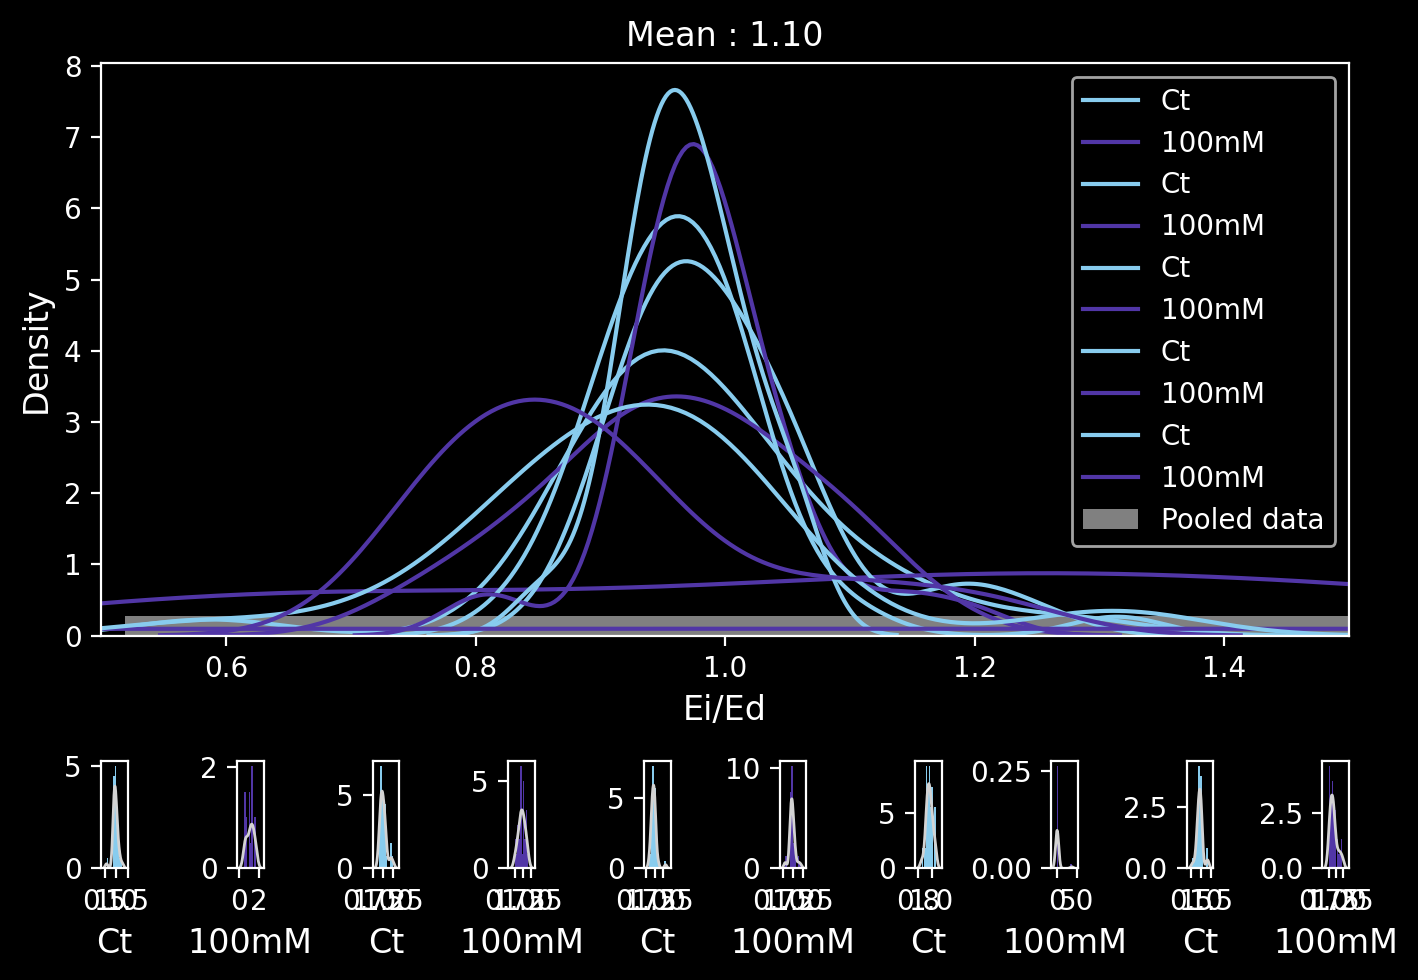

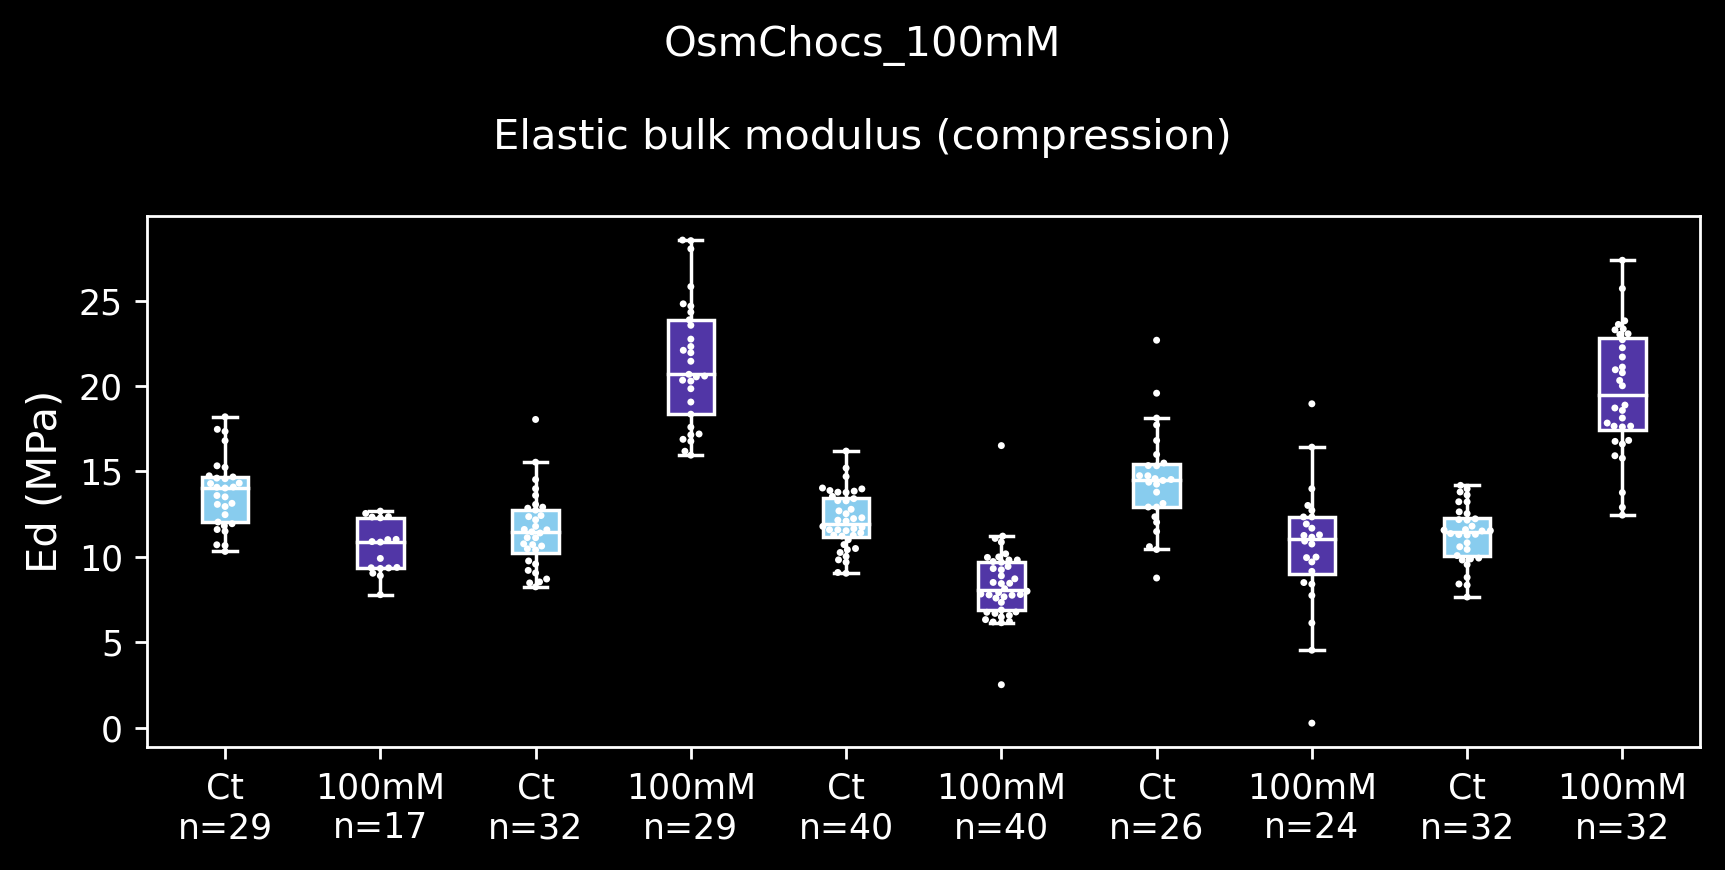

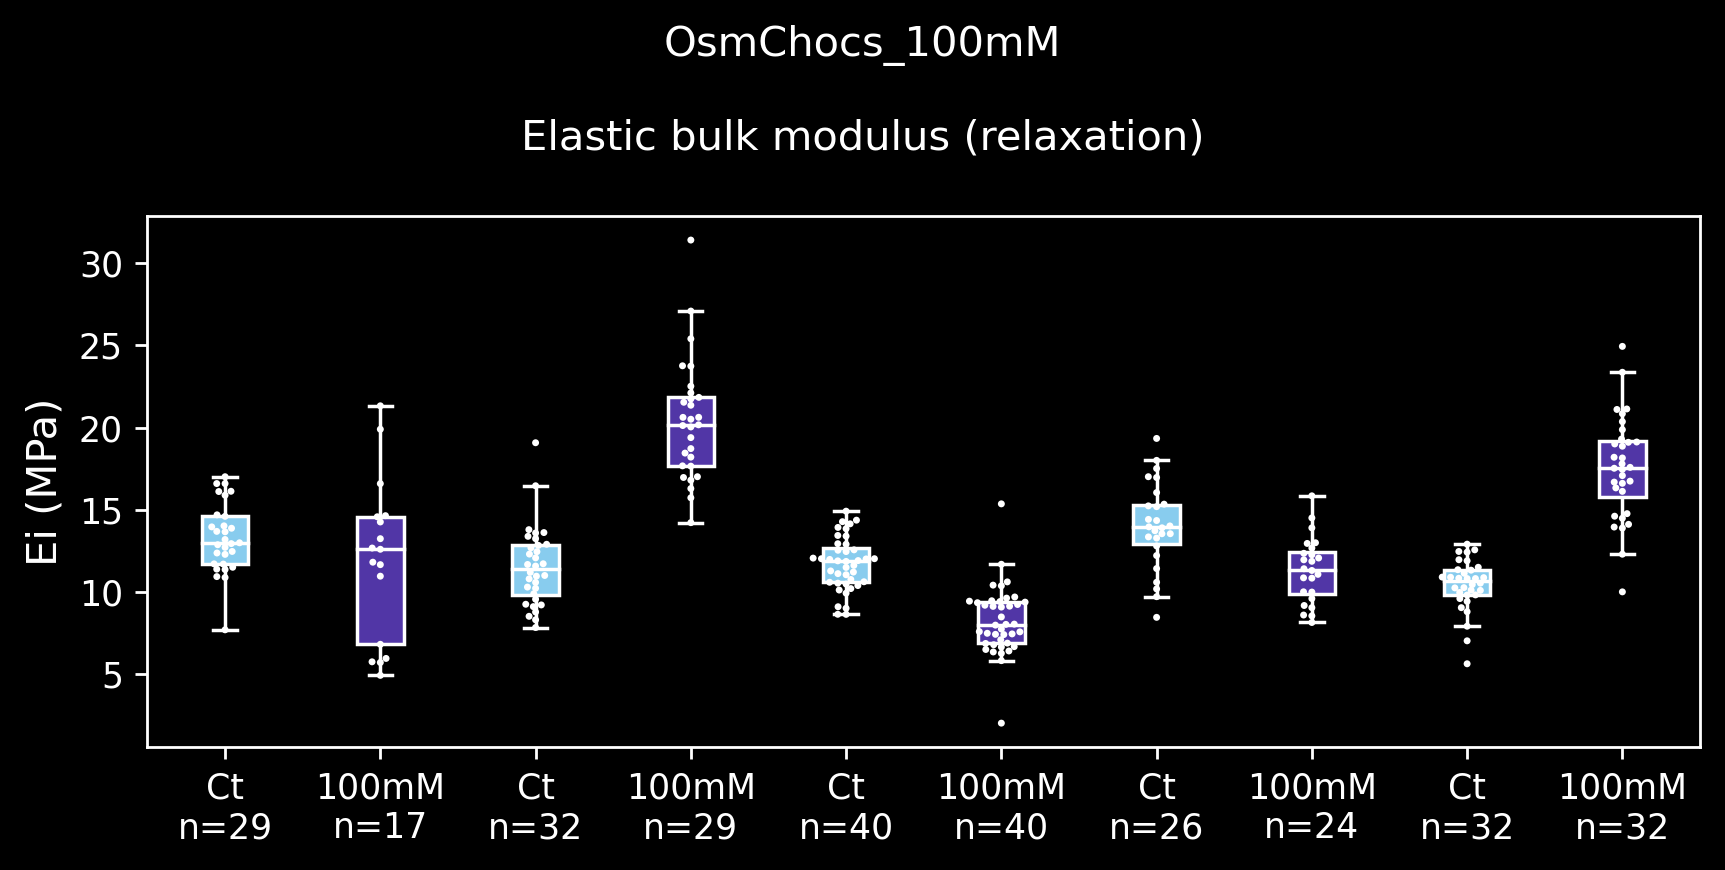

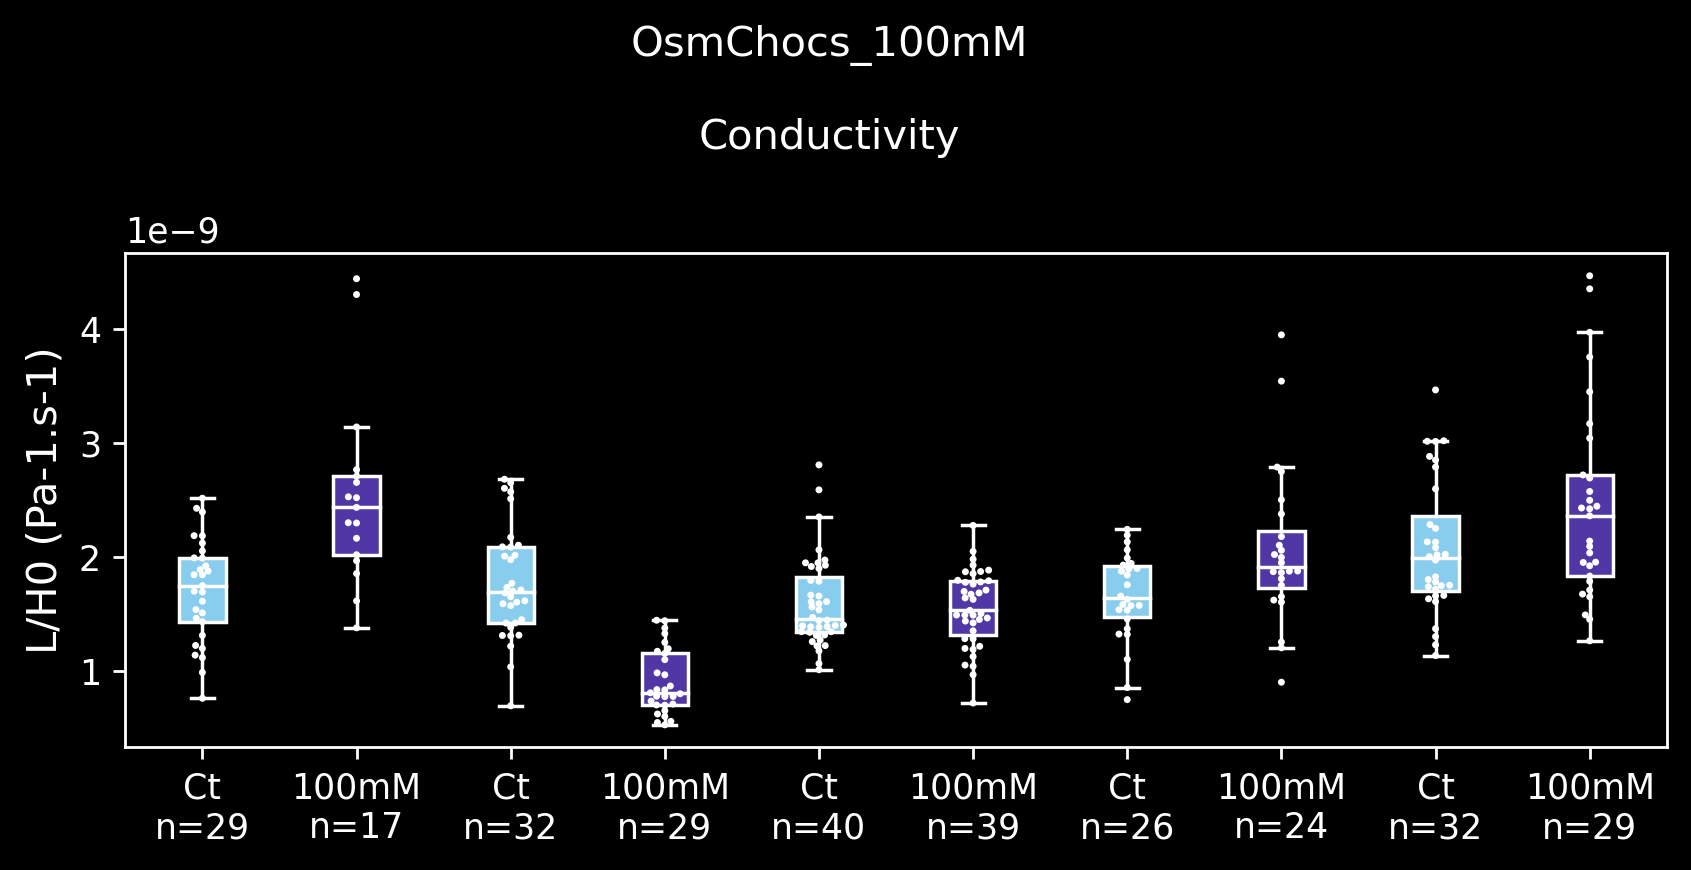

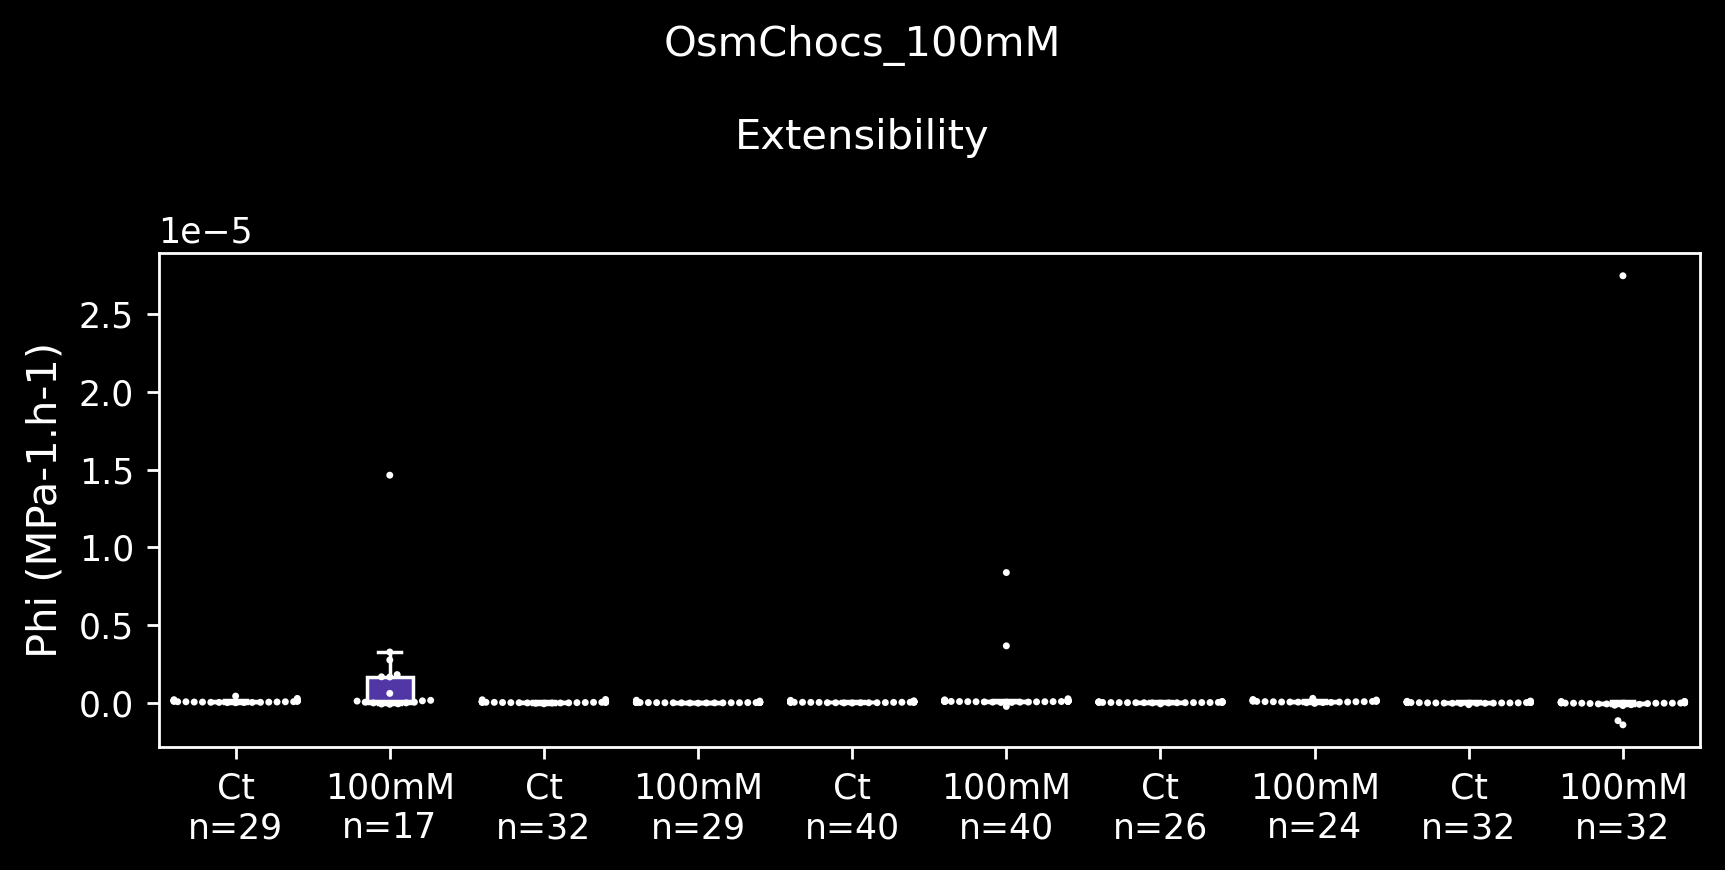

In [49]:
# vf.dataSummary([GD220928_Ct_Osmo, GD220928_100mM_Osmo],[40,40],
#             ['Ctrl','100mM growth'],1,'Ecomp','Modulus for hyper osmotic schock','MPa')

compareHydroMech([GD220301_Ct_Osmo, GD220301_100mM_Osmo, GD220808_Ct_Osmo, GD220808_100mM_Osmo, GD220928_Ct_Osmo,
                  GD220928_100mM_Osmo, GD221025_Ct_Osmo, GD221025_100mM_Osmo, GD230201_Ct_Osmo, GD230201_100mM_Osmo],
                 ['Ct','100mM','Ct','100mM','Ct','100mM','Ct','100mM','Ct','100mM'],
                [LightBlue,Blue,LightBlue,Blue,LightBlue,Blue,LightBlue,Blue,LightBlue,Blue], 
                 PFig, 'OsmChocs_100mM', showE = True, showTau = False,showbox = True,showhist = True,
                 stats='none',sigpairs=[(0,1),(2,3),(4,5),(6,7),(8,9)],indiplots=False);


# compareHydroMech([GD220301_Ct_Osmo, GD220808_Ct_Osmo,  GD220928_Ct_Osmo,
#                   GD221025_Ct_Osmo, GD230201_Ct_Osmo],
#                  ['Ct','Ct','Ct','Ct','Ct'],
#                 [LightBlue,LightRed,LightBlue,LightBlue,LightRed], 
#                  PFig, 'OsmChocs_100mM', showE = True, showTau = False,showbox = True,showhist = True,
#                  stats='ranksum',indiplots=False);

# compareHydroMech([GD_Man_Ct_Osmo,GD_Man_Tr_Osmo,GD_100mM_Ct_Osmo_HighE,GD_100mM_100mM_Osmo_HighE],
#               ['100mM_Ctrls_LowE\n','100mM_Treated_LowE\n','100mM_Ctrls_HighE\n','100mM_Treated_HighE\n'],
#               [LightBlue,Blue,LightRed,Red],
#                  PFig, 'OsmChocs_100mM', showE = True, showTau = False,showbox = True,showhist = False,
#                  stats='ranksum',sigpairs=[(0,1),(2,3),(0,2)],indiplots=False);

# compareHydroMech([GD_100mM_Ct_Osmo,GD_100mM_100mM_Osmo],
#               ['100mM_Ctrls\n','100mM_Treated\n'],
#               [LightBlue,Blue],
#                  PFig, 'OsmChocs_100mM', showE = True, showTau = False,showbox = True,showhist = False,
#                  stats='ranksum',indiplots=False);

# compareHydroMech([GD_100mM_Ct_Osmo_HighE,GD_100mM_100mM_Osmo_HighE],
#               ['100mM_Ctrls_HighE\n','100mM_Treated_HighE\n'],
#               [LightBlue,Blue,LightRed,Red],
#                  PFig, 'OsmChocs_100mM', showE = True, showTau = False,showbox = False,showhist = True,
#                  stats='ranksum',sigpairs=[(0,1),(2,3),(0,2)],indiplots=False);





# GOC_Comp([GD_100mM_Ct_LowE,GD_Man_Tr,GD_100mM_Ct_HighE,GD_100mM_100mM_HighE],
#          [GD_Man_Ct_Osmo,GD_Man_Tr_Osmo,GD_100mM_Ct_Osmo_HighE,GD_100mM_100mM_Osmo_HighE],
#          ['GR_ini','GR_end','GR_mean'],['L/H0'],['Initial growth rate (day-1)','Final growthRate (day-1)','Average growth rate (day-1)'],
#          ['conductivity'],
#          ['100mM_Ctrls_LowE\n','100mM_Treated_LowE\n','100mM_Ctrls_HighE\n','100mM_Treated_HighE\n'],
#           ['gray',LightBlue,Blue,LightRed,Red],
#           PlotFits=True,PlotStats=True,Norm=False,CorrType = 'spearman')




# GOC_Comp([GD_100mM_Ct_LowE,GD_Man_Tr],
#          [GD_Man_Ct_Osmo,GD_Man_Tr_Osmo],
#          ['A0fit','GR_end','GR_mean'],['Ecomp','Erel'],['Aire initiale avant croissance','Final growthRate (day-1)','Average growth rate (day-1)'],
#          ['Ed (MPa)','Ei (Mpa)'],
#          ['100mM_Ctrls_LowE\n','100mM_Treated_LowE\n'],
#           ['gray',LightBlue,Blue],
#           PlotFits=True,PlotStats=True,Norm=False,PooledOnly=False,CorrType = 'spearman')

# GOC_Comp([GD_100mM_Ct_HighE,GD_100mM_100mM_HighE],
#          [GD_100mM_Ct_Osmo_HighE,GD_100mM_100mM_Osmo_HighE],
#          ['GR_end','GR_mean'],['Ecomp','Erel'],['Final growthRate (day-1)','Average growth rate (day-1)'],
#          ['Ed (MPa)','Ei (Mpa)'],
#          ['100mM_Ctrls_HighE\n','100mM_Treated_HighE\n'],
#           ['gray',LightRed,Red],
#           PlotFits=False,PlotStats=True,Norm=False,PooledOnly=False,CorrType = 'spearman')



# GOC_Comp([GD220301_Ct, GD220301_100mM, GD220808_Ct, GD220808_100mM, GD220928_Ct,
#                   GD220928_100mM, GD221025_Ct, GD221025_100mM, GD230201_Ct, GD230201_100mM],
#          [GD220301_Ct_Osmo, GD220301_100mM_Osmo, GD220808_Ct_Osmo, GD220808_100mM_Osmo, GD220928_Ct_Osmo,
#                   GD220928_100mM_Osmo, GD221025_Ct_Osmo, GD221025_100mM_Osmo, GD230201_Ct_Osmo, GD230201_100mM_Osmo],
#          ['GR_ini','GR_end'],['L/H0'],['Initial growthRate (day-1)','Final growthRate (day-1)'],
#          ['Conductivity'],
#          ['Ct','100mM','Ct','100mM','Ct','100mM','Ct','100mM','Ct','100mM'],
#             ['gray',LightBlue,Blue], 
#           PlotFits=True,PlotStats=True,Norm=False,CorrType = 'spearman')



### ABA growth

#### 21-02-2023 (3.5µM)

In [41]:
# compareHydroMech([GD230221_Ct_Osmo, GD230221_ABA_Osmo],
#              ['Ctrl','ABA growth'],[Green,LightGreen], 
#              PFig, 'OsmChoc_21-02-2023', showbox = True,showhist = True,showTau=True,stats='ranksum');


#### 01-03-2023 (3.5µM)

In [42]:
# compareHydroMech([GD230301_Ct_Osmo, GD230301_ABA_Osmo],
#              ['Ctrl','ABA growth'],[Green,LightGreen], 
#              PFig, 'OsmChoc_01-03-2023', showbox = True,showhist = True,showTau=True,showE = False,stats='ranksum');

#### All together

n = 51
n = 34


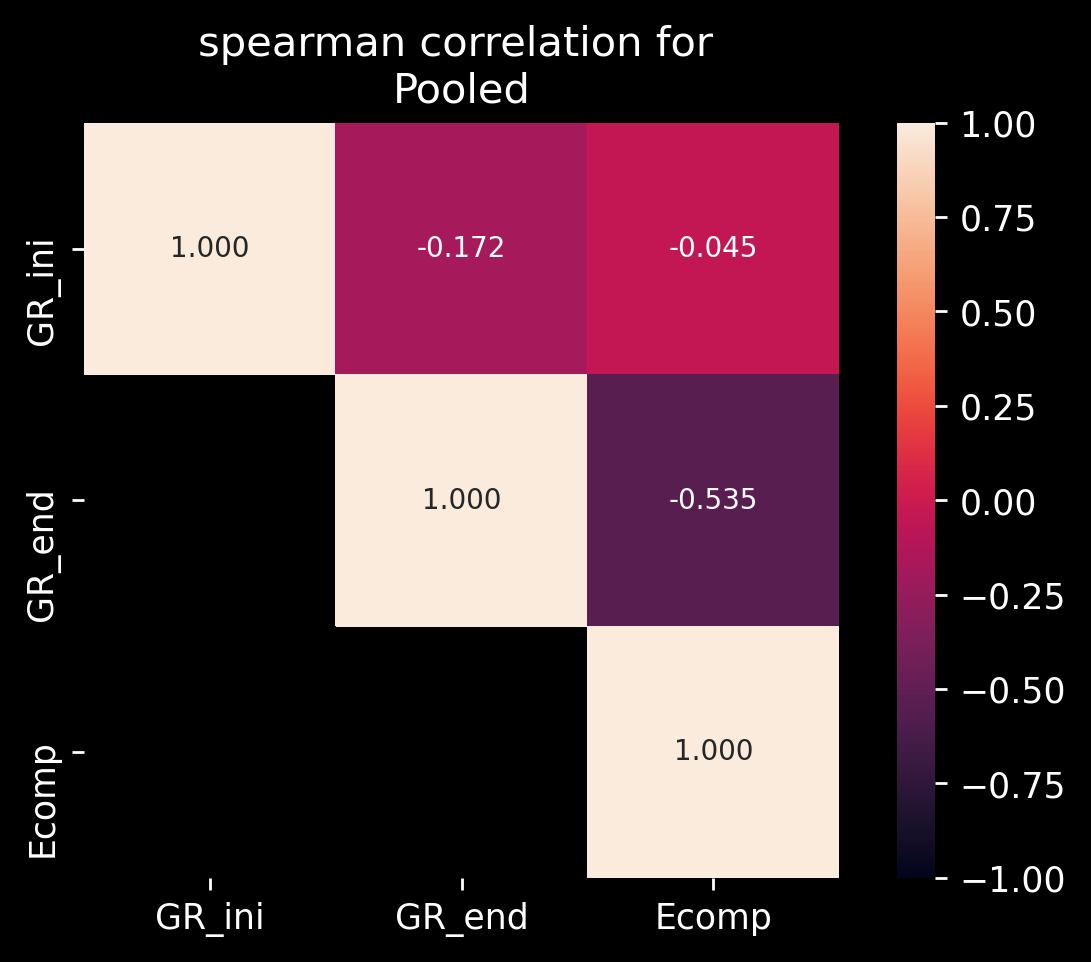

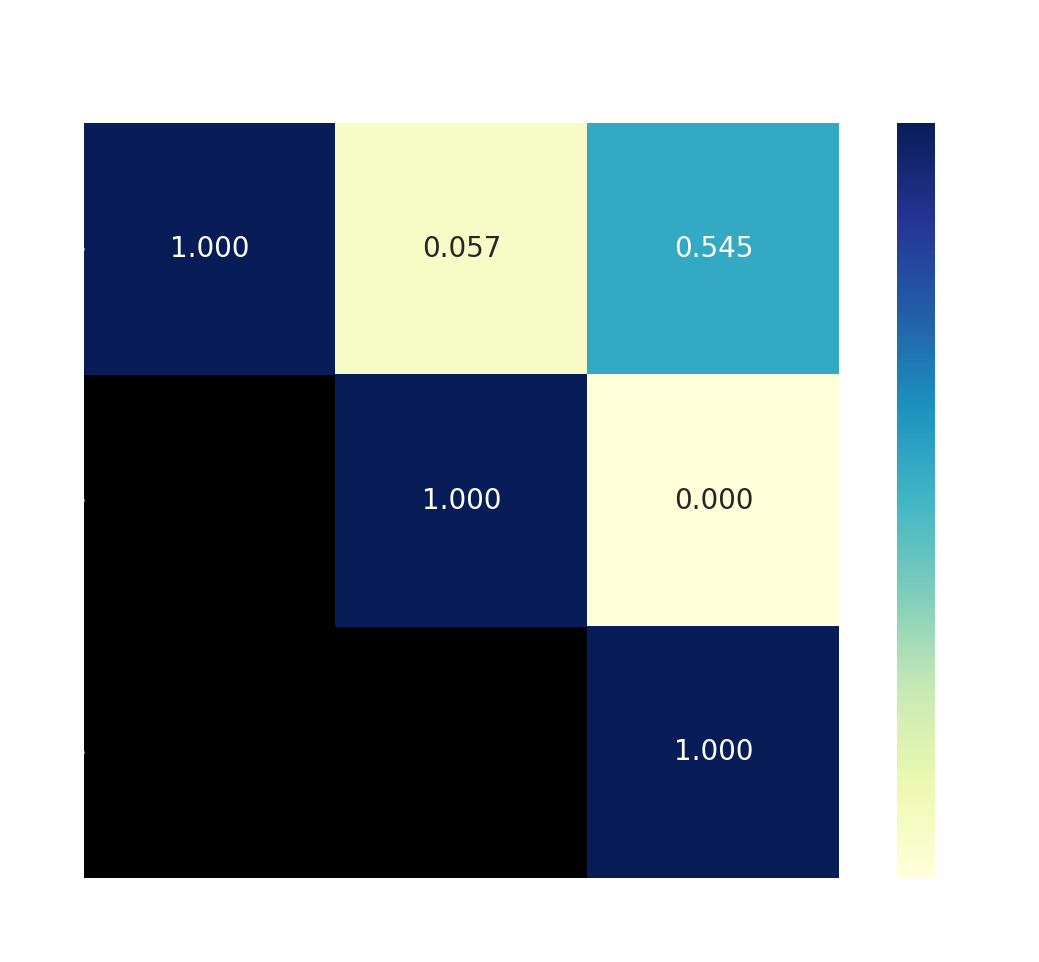

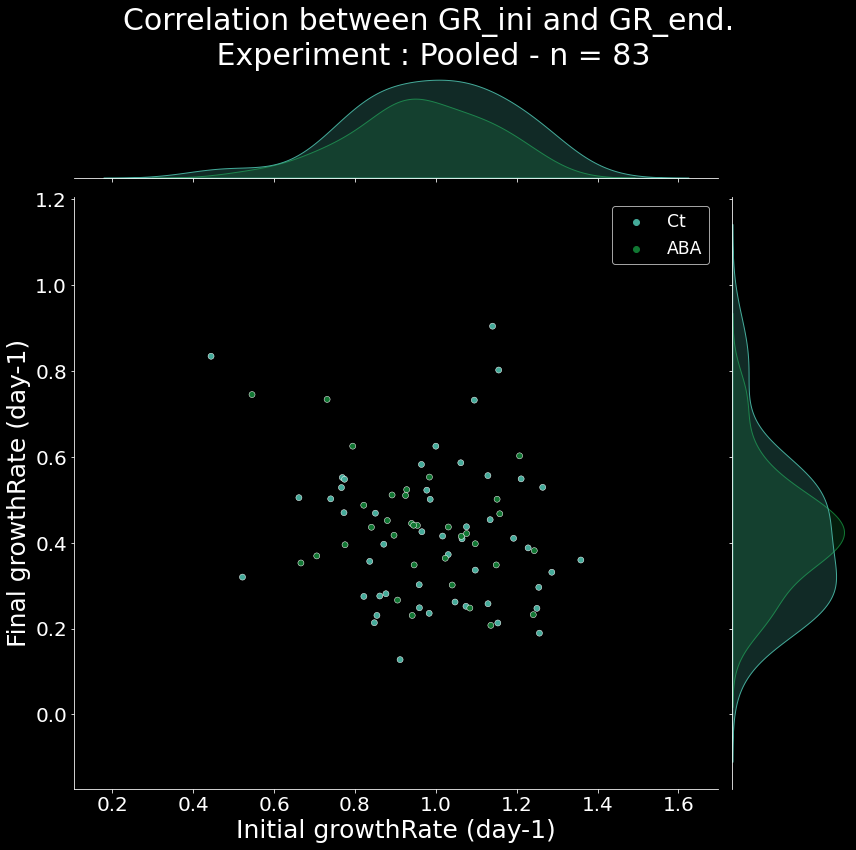

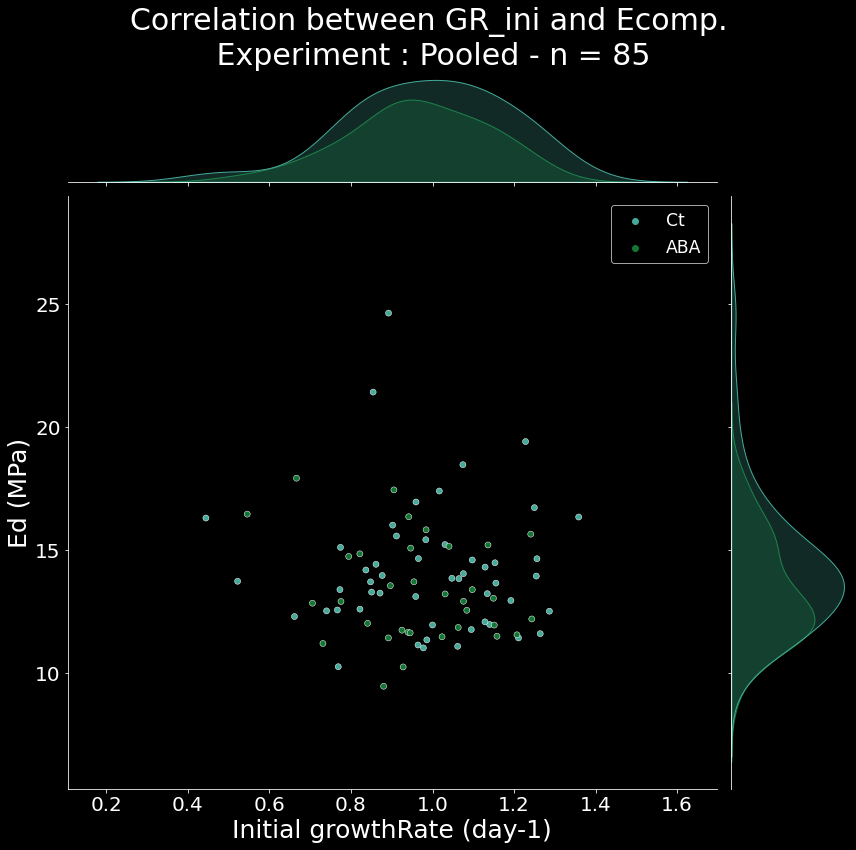

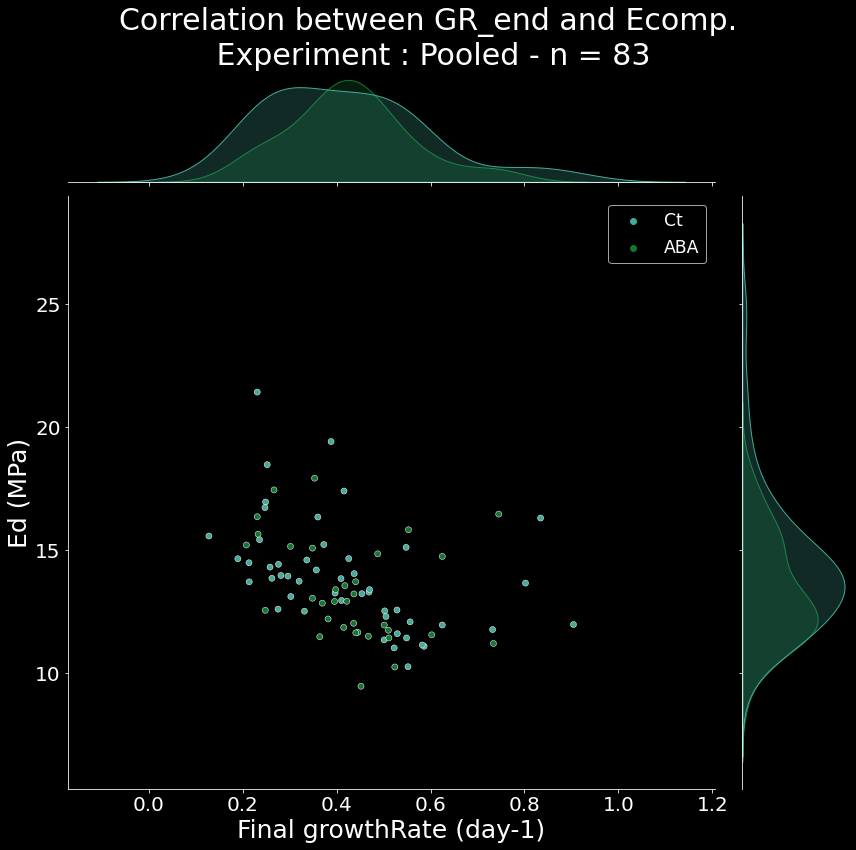

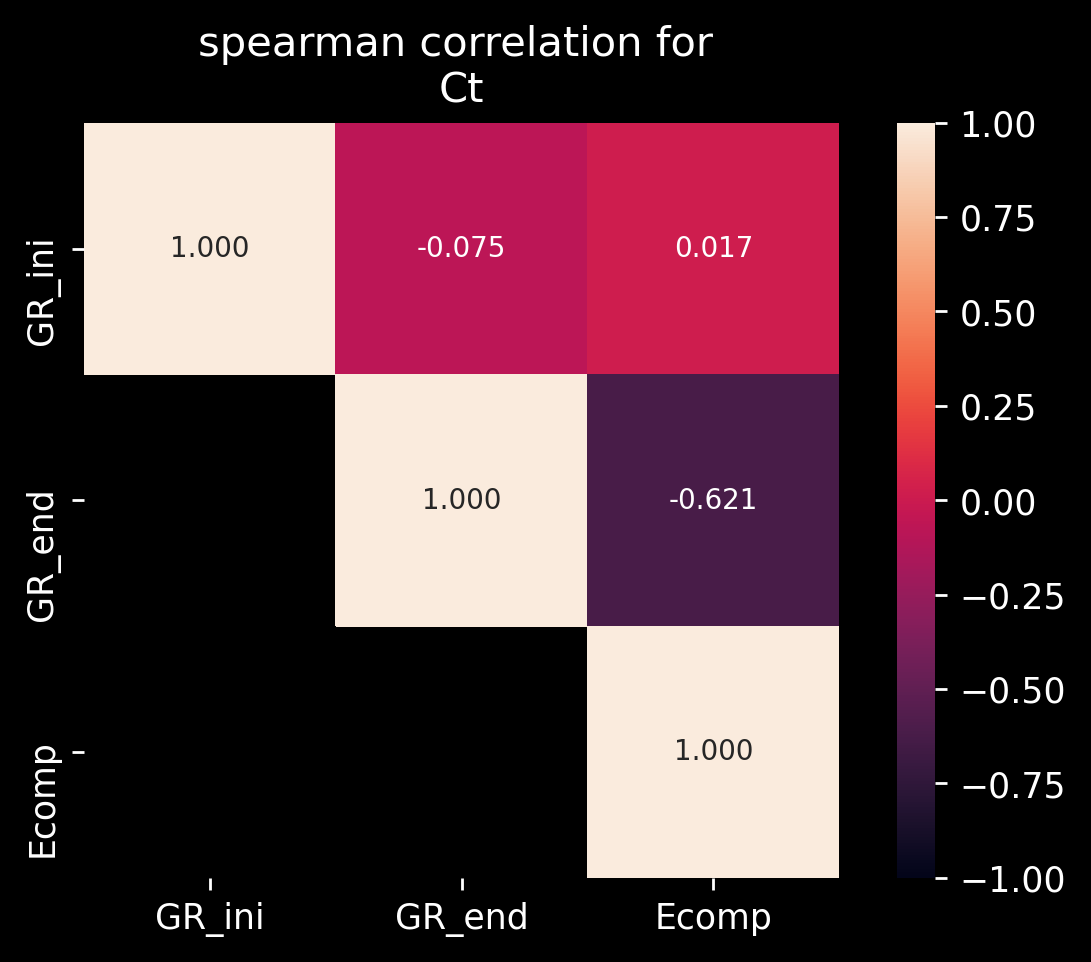

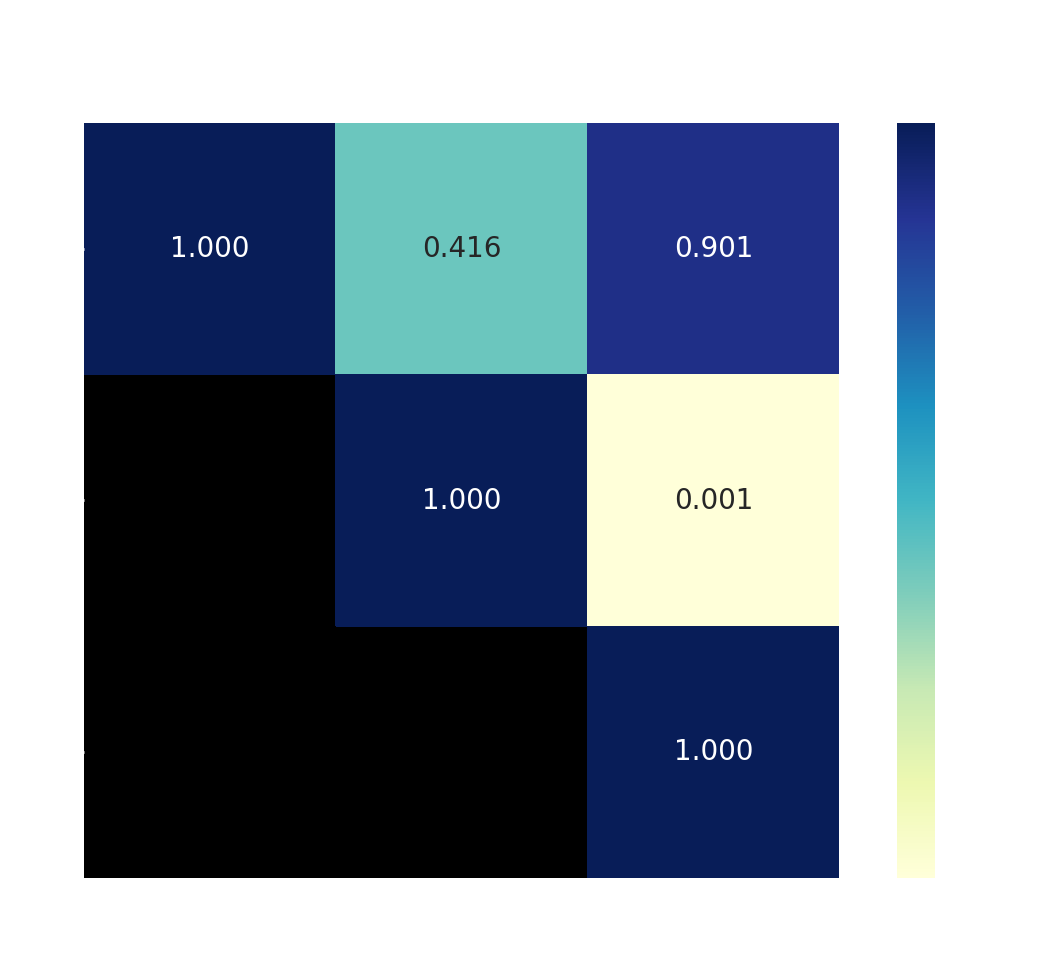

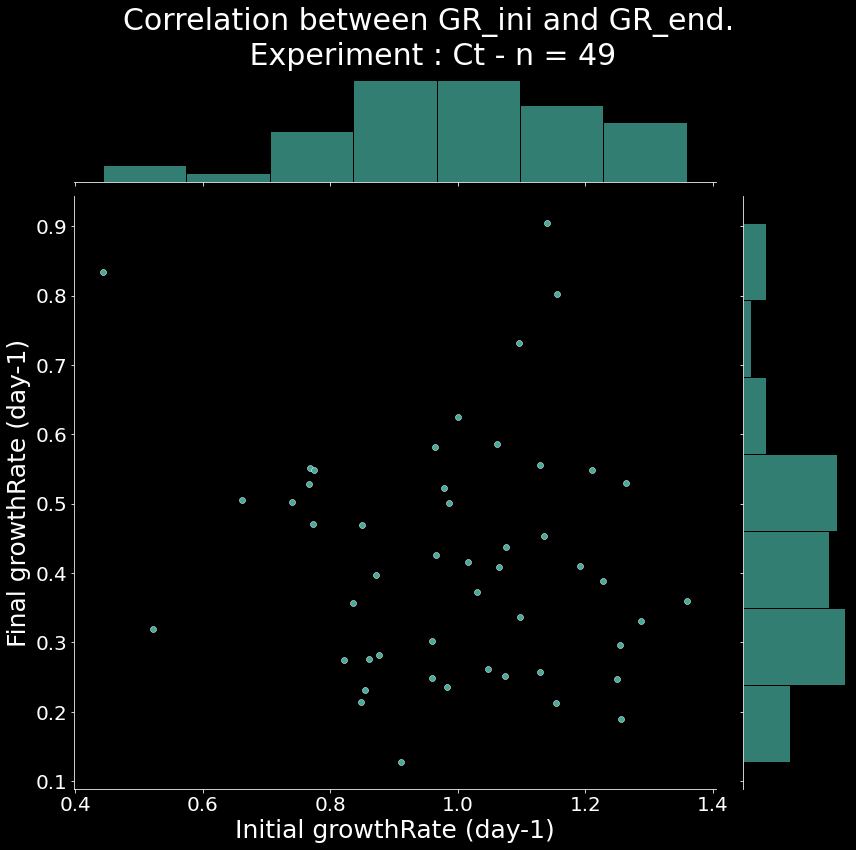

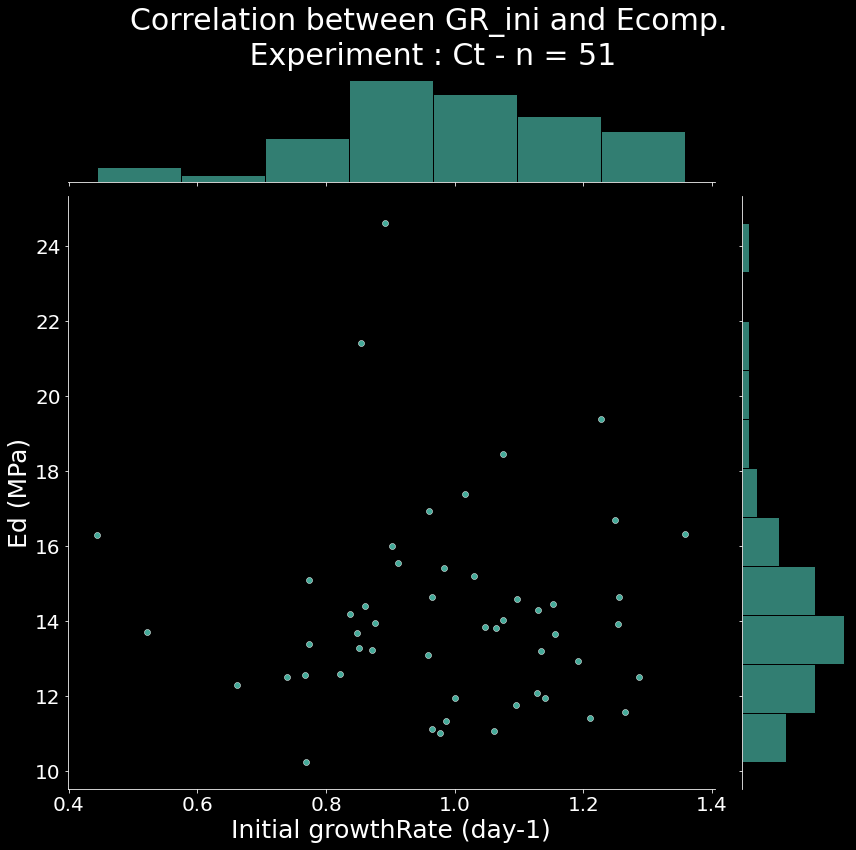

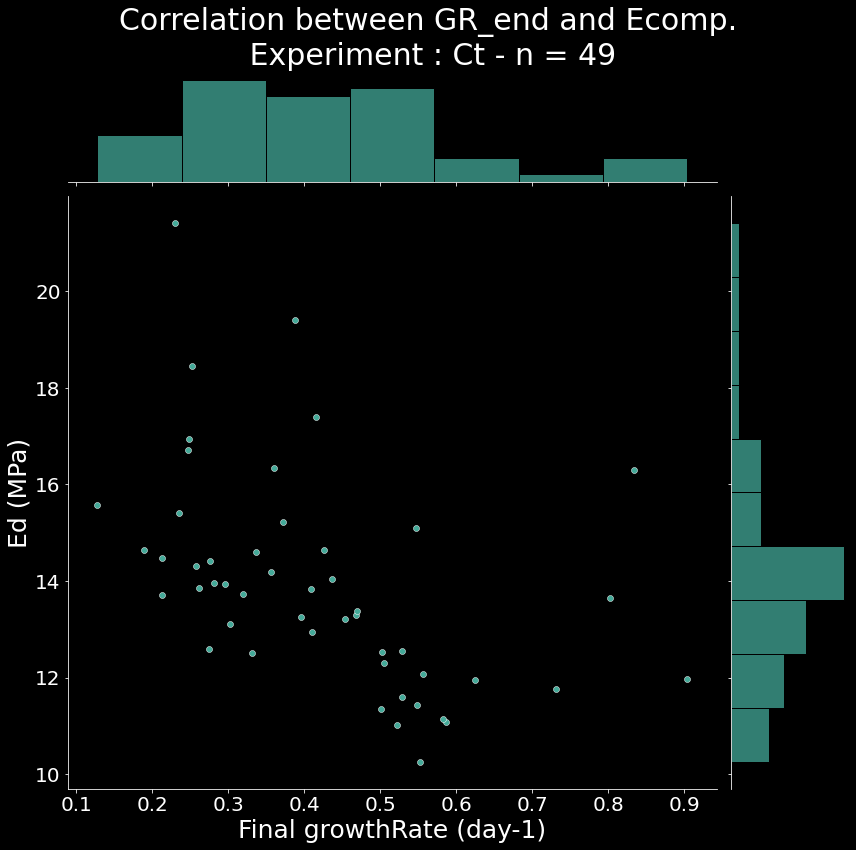

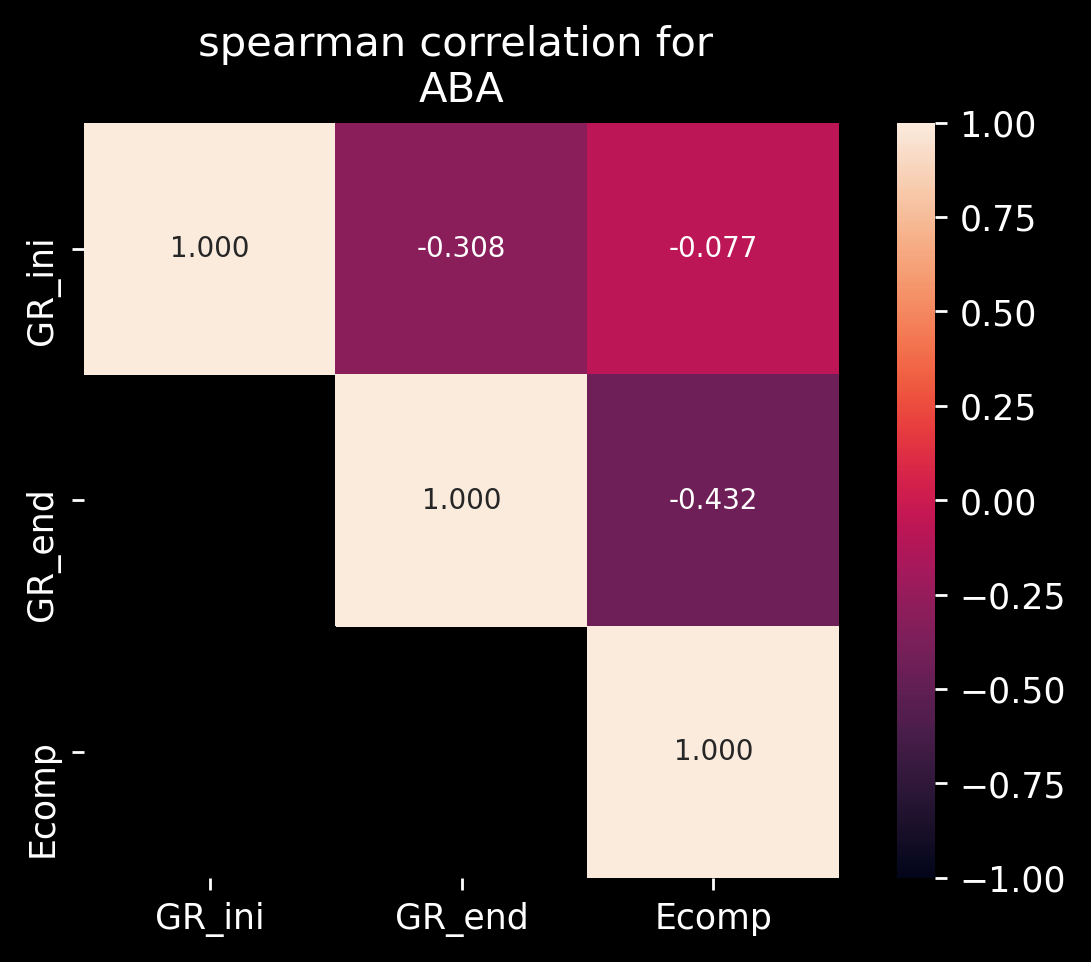

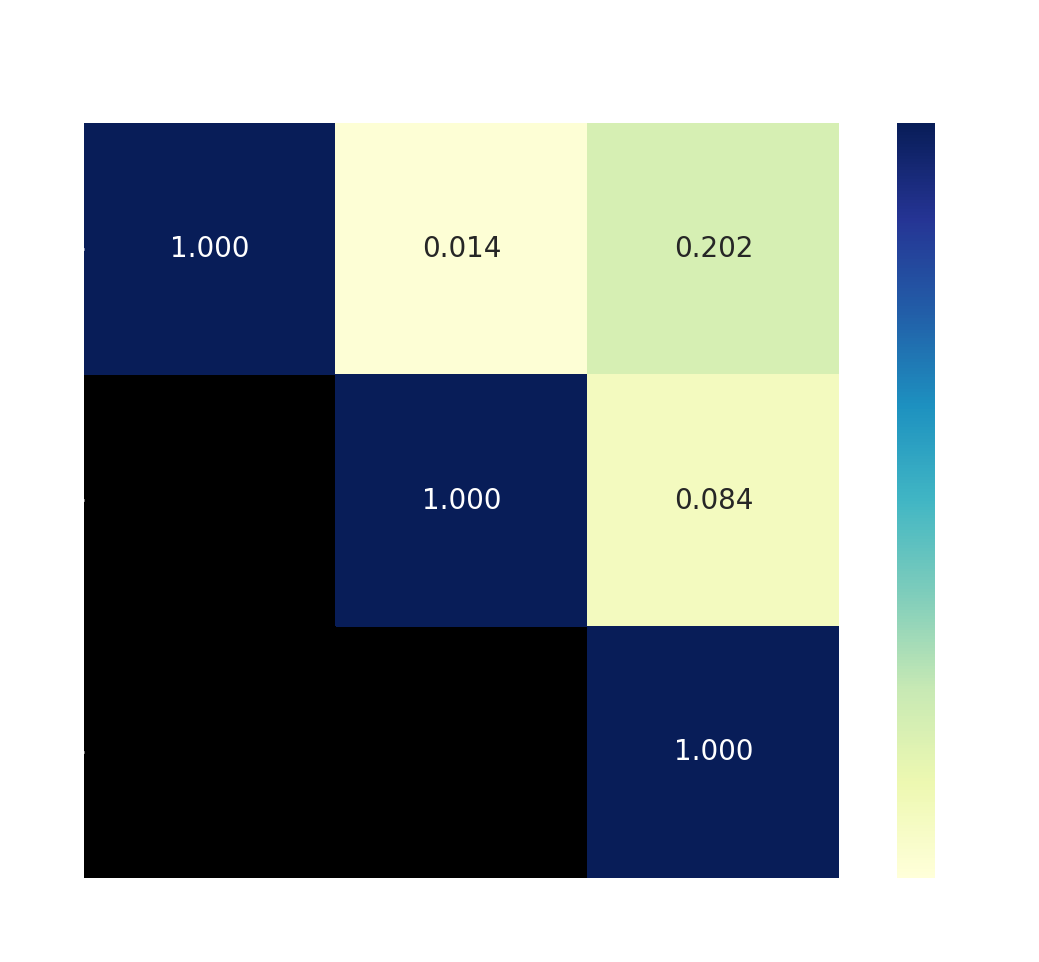

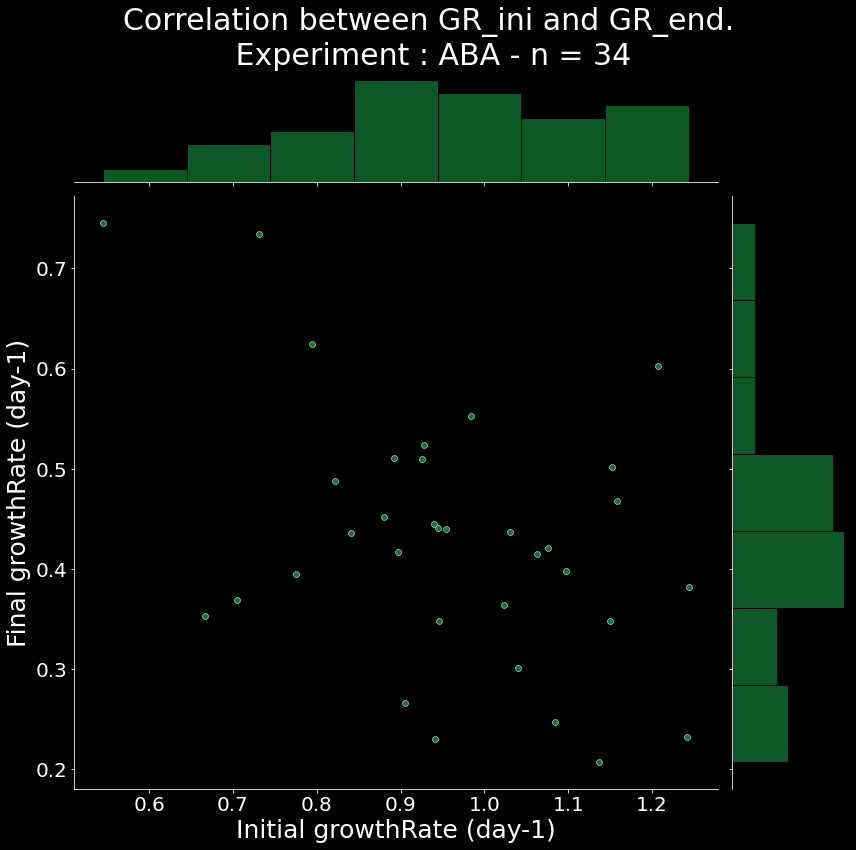

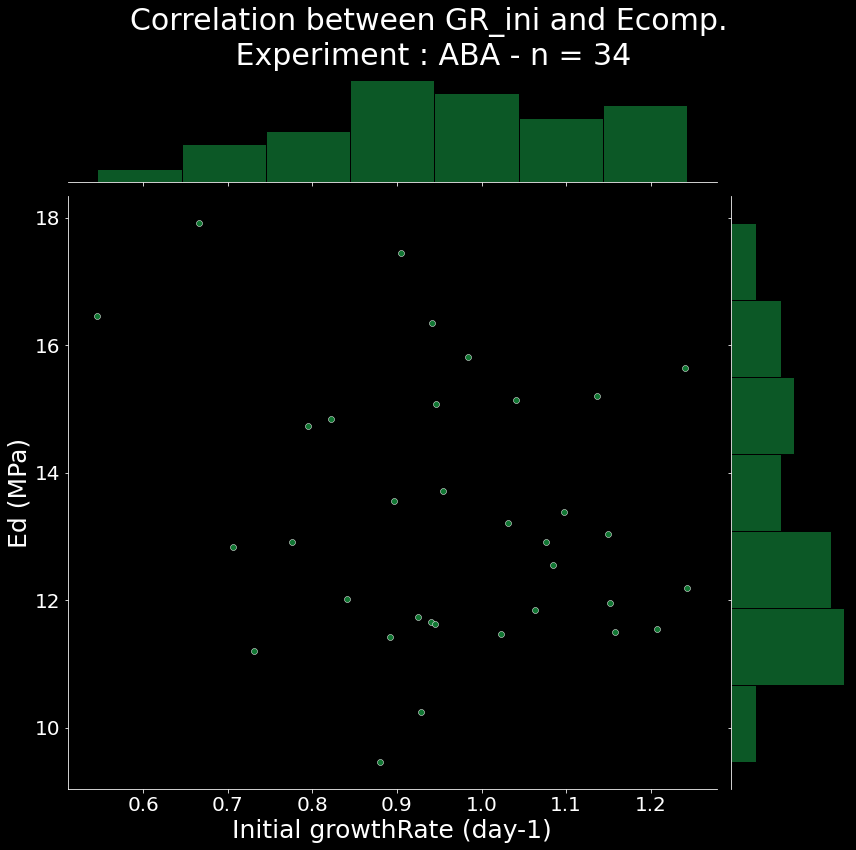

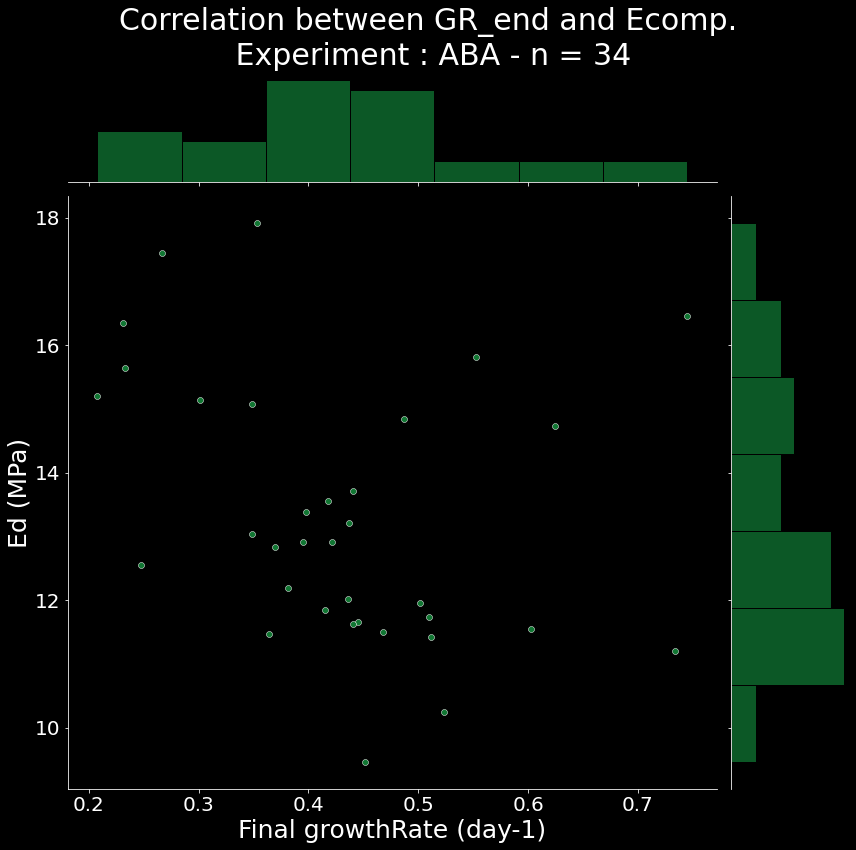

In [43]:
# compareHydroMech([GD_ABA_Ct_Osmo, GD_ABA_Tr_Osmo],
#              ['Ctrl','ABA growth'],[Green,LightGreen], 
#              PFig, 'OsmChoc_ABA', showbox = True,showhist = True,stats='ranksum');

GOC_Comp([GD_ABA_Ct, GD_ABA_Tr],
         [GD_ABA_Ct_Osmo, GD_ABA_Tr_Osmo],
         ['GR_ini','GR_end'],['Ecomp'],['Initial growthRate (day-1)','Final growthRate (day-1)'],
         ['Ed (MPa)'],
         ['Ct','ABA'],
          ['gray',LightGreen,Green],
          PlotFits=True,PlotStats=True,Norm=False,CorrType = 'spearman')


### Growth before and after OC

In [44]:

# plotGRratio([GD220531_Ct1,GD220531_Ct2,GD220301_Ct, GD220301_100mM, GD220808_Ct, GD220808_100mM, GD220928_Ct,
#                   GD220928_100mM, GD221025_Ct, GD221025_100mM, GD230201_Ct, GD230201_100mM],
#          [GD220531_Ct1_Osmo,GD220531_Ct2_Osmo,GD220301_Ct_Osmo, GD220301_100mM_Osmo, GD220808_Ct_Osmo, GD220808_100mM_Osmo, GD220928_Ct_Osmo,
#                   GD220928_100mM_Osmo, GD221025_Ct_Osmo, GD221025_100mM_Osmo, GD230201_Ct_Osmo, GD230201_100mM_Osmo],
#             ['Ctrl','Ctrl','Ct','100mM','Ct','100mM','Ct','100mM','Ct','100mM','Ct','100mM'],
#           [Blue,Blue,Blue,LightBlue,Blue,LightBlue,Blue,LightBlue,Blue,LightBlue,Blue,LightBlue]) 



# plotGRratio([GD_100mM_Ct,GD_100mM_100mM],
#          [GD_100mM_Ct_Osmo,GD_100mM_100mM_Osmo],
#             ['Ct','100mM'],
#           [Blue,LightBlue]) 


# plotGRratio([GD220531_Ct1,GD220531_Ct2],
#             [GD220531_Ct1_Osmo,GD220531_Ct2_Osmo],
#             ['220531_Ct1','220531_Ct2'],
#             [Red,Green]) 

# plt.figure(dpi=300)
# plt.hist(GD220531_Ct1.append(GD220531_Ct2).append(GD220928_Ct).append(GD220801_Ct1).append(GD221025_Ct)['GR_end'],
#          color = 'b',bins=20,alpha = 0.7)
# plt.hist(GD220531_Ct1_Osmo.append(GD220531_Ct2_Osmo).append(GD220928_Ct_Osmo).append(GD220801_Ct1_Osmo).append(GD221025_Ct_Osmo)['GR_AfterOC'],
#          color = 'r',bins=15,alpha = 0.7)
# plt.hist(GD220531_Ct1_Osmo.append(GD220531_Ct2_Osmo).append(GD220928_Ct_Osmo).append(GD220801_Ct1_Osmo).append(GD221025_Ct_Osmo)['GR_InOC'],
#          color = 'gray',bins=100,alpha = 0.7)
# plt.ylabel('Density')
# plt.xlabel('Growth rate (day-1)')
# plt.legend(['Before shock','After both shocks','After hyperosmotic shock'])



# plotGRratio([GD220531_Ct2,GD220928_100mM,GD221025_Ct],
#             [GD220531_Ct2_Osmo,GD220801_Ct1_Osmo,GD221025_Ct_Osmo],
#             ['220531_Ct2 (2)','220928_100mM (2)','GD221025_Ct (2)'],
#             [LightRed,LightGreen,LightBlue]) 


# plotGRratio([GD220531_Ct1,GD220531_Ct2,GD220801_Ct1,GD220928_Ct,GD220928_100mM,GD221025_Ct],
#             [GD220531_Ct1_Osmo,GD220531_Ct2_Osmo,GD220801_Ct1_Osmo,GD220928_Ct_Osmo,GD220928_100mM_Osmo,GD221025_Ct_Osmo],
#             ['220531_Ct1 (1)','220531_Ct2 (2)','220801_Ct1 (1)','220928_Ct (1)','220928_100mM (2)','GD221025_Ct (2)'],
#             [Red,LightRed,Green,LightGreen,Blue,LightBlue]) 

# paper fig (no mech of 100mM growth)

# plotGRratio([GD221025_Ct,GD220531_Ct1,GD220531_Ct2,GD220928_Ct],
#             [GD221025_Ct_Osmo,GD220531_Ct1_Osmo,GD220531_Ct2_Osmo,GD220928_Ct_Osmo],
#             ['Ctrl2','Ctrl4_1','Ctrl4_2','Ctrl5'],
#             [Blue,Red,Yellow,LightYellow,Green]) 

# plotGRratio([GD221025_Ct,GD220531_Ct1,GD220928_Ct],
#             [GD221025_Ct_Osmo,GD220531_Ct1_Osmo,GD220928_Ct_Osmo],
#             ['Ctrl2','Ctrl4_1','Ctrl5'],
#             [Blue,Red,Yellow,Green]) 







In [45]:

# GD = GD220531_Ct1

# AllGRvar = np.empty(0)
# AllGRvarMedian = np.empty(0)

# f1,ax1 = plt.subplots(dpi=200)
# f1.patch.set_facecolor('white')
# f1.suptitle('All data pooled')

# f2,ax2 = plt.subplots(dpi=200)
# f2.patch.set_facecolor('white')
# f2.suptitle('Median per PPG')


# for s in tqdm(np.unique(GD.index)):
#     GR = GD.loc[s,'GR_Full'].to_numpy()
    
#     GRvar = np.abs(np.divide(GR[1:-1],GR[0:-2]))
#     GRvarInWindow = np.round(len(GRvar[(GRvar>0) & (GRvar<2)])/len(GRvar)*1000)/10
    
#     AllGRvar = np.append(AllGRvar,GRvar)
#     AllGRvarMedian = np.append(AllGRvarMedian,np.median(GRvar))
    
#     f0,ax0 = plt.subplots(dpi=200)
#     f0.patch.set_facecolor('white')
#     f0.suptitle(s + ' (' + str(GRvarInWindow) + '% in window) + median')
#     ax0.hist(GRvar, range = (0,2), bins = 21,color='r', density = True)
#     lims = ax0.get_ylim()
#     ax0.plot([np.median(GRvar),np.median(GRvar)],lims,'--',color = 'lightgray')
#     ax0.set_ylim(lims)
    
# ax1.hist(AllGRvar, range = (0,2), bins = 21,color='b', density = True)
# ax2.hist(AllGRvarMedian, range = (0,2), bins = 21,color='b', density = True)

### Successive OC

In [46]:
# successiveOC(GD221025_Ct_Osmo,GD221025_Ct_Osmo2)

# successiveOC(GD221201_Ct_Osmo,GD221201_Ct_Osmo2)

### Mechanics and size correlation

In [47]:
# Corr([GD221025_Ct_Osmo.append(GD220531_Osmo).append(GD220928_Ct_Osmo).append(GD221201_Ct_Osmo).append(GD221206_Ct_Osmo),
#      GD221025_Ct_Osmo,GD220531_Osmo,GD220928_Ct_Osmo,GD221201_Ct_Osmo,GD221206_Ct_Osmo],
#      ['Pooled','221025_Ct','220531_Ct','220928_Ct','221201_Ct','221206_Ct'],
#      columns = ['A0','Ecomp'],columnslabels = ['Size (mm²)', 'Elastic modulus (MPa)'],PlotFits = True,
#      colors=['gray',Blue,Yellow,Green,Red,Purple], corrmethod ='spearman')

# GlobalData221201_Ct_Osmo
# GlobalData221206_Ct_Osmo

# GD221025_Ct_Osmo,GD220531_Osmo,GD220928_Ct_Osmo